### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Agumentation


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 1]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 22 de Noviembre. Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Feed Forward para Airbnb
* 2 - Reconocimiento de Imagenes en CIFAR10    
* 3 - Reconocimiento de frutas y verduras

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

_________________________

# 1 - Redes Feed Forward para Airbnb

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa estan conectadas a todos los inputs y envian su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient_ y el _exploding gradient_, viendo también algunos optimizadores existentes. 

Para realizar esto, utilizaremos una base de datos de precios de inmuebles anunciados en Airbnb, la cual se encuentra disponible en _Kaggle_, en la siguiente URL: https://www.kaggle.com/stevezhenghp/airbnb-price-prediction. El dataset cuenta de casi mil registros, donde podemos encontrar el logaritmo del precio del anuncio, el tipo de propiedad, las amenidades disponibles, el número de personas que puede alojar, el número de baños, entre otros. 
Nuesta tarea durante esta pregunta será predecir el valor del logaritmo del precio del anuncio a partir de algunas de las otras variables presentes en el dataset. Para esto primero deberán preprocesar los datos para transformarlos a una forma que pueda ser utilizada por una red neuronal o eliminarlos en el caso que se estime conveniente. Una vez separados los datos de entrenamiento, validación y test, procederemos a entrenar diferentes modelos, comparandolos y evaluando sus desempeños. 

### 1.a Carga de datos y primeros análisis
Cargue los datos en un _dataframe_ como muestra el código. Explore superficialmente los datos utilizando los metodos `.head`, `.describe` o `.info` del _DataFrame_.

In [0]:
import pandas as pd

df_tr = pd.read_csv("train.csv")

In [0]:
df_tr.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [0]:
df_tr.info

<bound method DataFrame.info of              id  log_price property_type  ...  zipcode bedrooms  beds
0       6901257   5.010635     Apartment  ...    11201      1.0   1.0
1       6304928   5.129899     Apartment  ...    10019      3.0   3.0
2       7919400   4.976734     Apartment  ...    10027      1.0   3.0
3      13418779   6.620073         House  ...  94117.0      2.0   2.0
4       3808709   4.744932     Apartment  ...    20009      0.0   1.0
...         ...        ...           ...  ...      ...      ...   ...
74106  14549287   4.605170     Apartment  ...  11206.0      1.0   1.0
74107  13281809   5.043425     Apartment  ...    90254      2.0   4.0
74108  18688039   5.220356     Apartment  ...  11206.0      2.0   2.0
74109  17045948   5.273000     Apartment  ...    10011      0.0   2.0
74110   3534845   4.852030          Boat  ...    90802      1.0   2.0

[74111 rows x 29 columns]>

In [0]:
df_tr.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Separaremos las columnas en distintas categorías pues deberan ser tratadas de maneras distintas. Las columnas "others" y "categorical" ya están separadas, complete las numéricas y las fechas.

¿Qué particularidad tiene las columnas agrupadas en "otros" y porque esto nos complicará su utilización?

In [0]:
other_col = df_tr.columns[[4,11,25,21]]
cat_col = df_tr.columns[[0,2,3,7,8,9,10,13,14,17,22,26]]
num_col = df_tr.columns[[1,5,6,15,19,20,23,24,27,28]]
date_col = df_tr.columns[[12,16,18]]

for col in df_tr[other_col].columns:
    print(col)

amenities
description
thumbnail_url
name


Explore más en detalle la columna `amenities` y explique por qué sería interesante rescatar la información contenida en ella tomando en cuenta el problema en cuestión.

In [0]:
df_tr.amenities.describe

<bound method NDFrame.describe of 0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 74111, dtype: object>

###### **Data**
se puede apreciar diferentes tipos de datos dentro, los cuales hay algunos demasiados cualitativos y de difícil manejo como la "descripción", que está dentro de las columnas agrupadas en "otras" debido a que tienen datos más "flexibles" y que no abarcan mayor información, además de ser más difíciles de tratar al ser texto, a excepción de "amenities", cuya categoría muestra un conjunto con características importantes que tiene el inmueble, por ende implica un poco más de trabajo para rescatar esa información relevante. En cuanto a las columnas URL y name no son de importancia, debido a su naturaleza subjetiva y sin ser concretamente información relevante.



### 1.b Amenities como categórica
En esta pregunta extraeremos cada una de las `amenities` posibles y la representaremos como una columna categorica, es decir una columna con un 1 si esa característica aparece como disponible en el anuncio y un 0 en caso contrario. 
Para esto primero extraiga un conjunto de todas las amenities posibles. Puede utilizar el método `.apply` de las `Series` de pandas para transformar las entradas de la columna a una lista de las _amenities_ como muestra el código. Luego puede usar un `set` para evitar repeticiones inecesarias.

In [0]:
amenities_as_lists = df_tr['amenities'].apply(lambda x: x.replace("{",'').replace("}",'').replace("\"",'').split(','))
aux_list = list()
amenities_set = set()
for i in amenities_as_lists:
  aux_list = list(amenities_set)+i 
  amenities_set = set(aux_list)

print(f"Hay un total de {len(amenities_set)} amenities posibles")
print(amenities_set)

Hay un total de 131 amenities posibles
{'', 'Garden or backyard', 'Dishes and silverware', 'Hot water', 'Coffee maker', 'Air purifier', 'Well-lit path to entrance', 'Hair dryer', 'Pets allowed', 'Safety card', 'translation missing: en.hosting_amenity_50', 'TV', 'Family/kid friendly', 'Babysitter recommendations', 'Private living room', 'Iron', 'First aid kit', 'Children’s dinnerware', 'Wireless Internet', 'Luggage dropoff allowed', 'Table corner guards', 'High chair', 'Cable TV', 'Washer / Dryer', 'Wide hallway clearance', 'Indoor fireplace', 'Flat', 'Breakfast', 'Window guards', 'Washer', 'Changing table', 'Ground floor access', 'Wide clearance to shower and toilet', 'EV charger', 'Cat(s)', 'Essentials', 'Wide clearance to shower & toilet', 'Firm mattress', 'Free parking on premises', 'Fireplace guards', 'Fire extinguisher', 'Accessible-height toilet', 'Air conditioning', 'Paid parking off premises', 'Body soap', 'Hand or paper towel', 'Game console', 'Roll-in shower with chair', 'Gym

Cuente la cantidad de apariciones de cada _amenity_ en el _dataset_. 

Claramente algunos valores tienen muy pocos ejemplos, lo cual tiene sentido considerando el problema. Optaremos por no considerar las amenities que aparezcan en menos de 1000 anuncios. 

Cree ahora nuevas columnas en el _DataFrame_, donde cada columna corresponda a una _amenity_ que cumpla el criterio y se represente binariamente, como muestra el esqueleto de código.

Aprovecharemos de eliminar las otras columas `others` pues para el alcance de esta tarea no vale la pena considerarlas.

In [0]:
dic = dict()
for am in amenities_set:
  c = 0
  for l in amenities_as_lists:
    if(am in l):
      c += 1
  dic[am] = c 

In [0]:
print(dic.keys())
print(dic.values())

dict_keys(['', 'Garden or backyard', 'Dishes and silverware', 'Hot water', 'Coffee maker', 'Air purifier', 'Well-lit path to entrance', 'Hair dryer', 'Pets allowed', 'Safety card', 'translation missing: en.hosting_amenity_50', 'TV', 'Family/kid friendly', 'Babysitter recommendations', 'Private living room', 'Iron', 'First aid kit', 'Children’s dinnerware', 'Wireless Internet', 'Luggage dropoff allowed', 'Table corner guards', 'High chair', 'Cable TV', 'Washer / Dryer', 'Wide hallway clearance', 'Indoor fireplace', 'Flat', 'Breakfast', 'Window guards', 'Washer', 'Changing table', 'Ground floor access', 'Wide clearance to shower and toilet', 'EV charger', 'Cat(s)', 'Essentials', 'Wide clearance to shower & toilet', 'Firm mattress', 'Free parking on premises', 'Fireplace guards', 'Fire extinguisher', 'Accessible-height toilet', 'Air conditioning', 'Paid parking off premises', 'Body soap', 'Hand or paper towel', 'Game console', 'Roll-in shower with chair', 'Gym', 'Host greets you', 'Privat

In [0]:
import matplotlib.pyplot as plt

c = 0
for k,v in dic.items():
  if(v>=1000 and v<50000):
    print('SI - '+k,' ' +str(v))
  else:
    c += 1
    print('NO - '+k)
print('Cantidad de amenities borrados: ',c)

NO - 
SI - Garden or backyard  1129
SI - Dishes and silverware  4255
SI - Hot water  4267
SI - Coffee maker  3555
NO - Air purifier
NO - Well-lit path to entrance
SI - Hair dryer  43330
SI - Pets allowed  10197
SI - Safety card  11513
SI - translation missing: en.hosting_amenity_50  25291
NO - TV
SI - Family/kid friendly  37026
NO - Babysitter recommendations
SI - Private living room  2524
SI - Iron  41687
SI - First aid kit  27532
NO - Children’s dinnerware
NO - Wireless Internet
SI - Luggage dropoff allowed  1640
NO - Table corner guards
NO - High chair
SI - Cable TV  24253
NO - Washer / Dryer
NO - Wide hallway clearance
SI - Indoor fireplace  9300
NO - Flat
SI - Breakfast  8306
NO - Window guards
SI - Washer  43169
NO - Changing table
NO - Ground floor access
NO - Wide clearance to shower and toilet
NO - EV charger
SI - Cat(s)  3593
NO - Essentials
NO - Wide clearance to shower & toilet
NO - Firm mattress
SI - Free parking on premises  23639
NO - Fireplace guards
SI - Fire extinguis

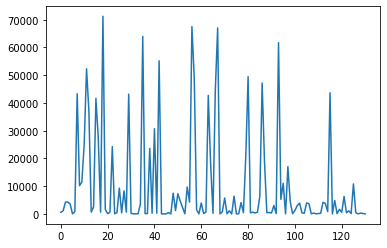

In [0]:
plt.plot(range(len(dic.values())),list(dic.values()))

In [0]:
other_col

Index(['amenities', 'description', 'thumbnail_url', 'name'], dtype='object')

In [0]:
for i, amenity in enumerate(amenities_set):
    if dic[amenity] >= 1000 and dic[amenity] < 50000:
         df_tr['ammenity_'+str(i)] = df_tr['amenities'].apply(lambda x: 1 if amenity in x else 0)

df_tr = df_tr.drop(columns=other_col)

In [0]:
df_tr.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,ammenity_1,ammenity_2,ammenity_3,ammenity_4,ammenity_7,ammenity_8,ammenity_9,ammenity_10,ammenity_12,ammenity_14,ammenity_15,ammenity_16,ammenity_19,ammenity_22,ammenity_25,...,ammenity_48,ammenity_49,ammenity_50,ammenity_51,ammenity_52,ammenity_54,ammenity_55,ammenity_57,ammenity_58,ammenity_60,ammenity_63,ammenity_64,ammenity_66,ammenity_70,ammenity_72,ammenity_74,ammenity_77,ammenity_79,ammenity_80,ammenity_85,ammenity_86,ammenity_87,ammenity_91,ammenity_94,ammenity_95,ammenity_97,ammenity_98,ammenity_100,ammenity_101,ammenity_102,ammenity_105,ammenity_106,ammenity_112,ammenity_113,ammenity_115,ammenity_117,ammenity_119,ammenity_121,ammenity_123,ammenity_125
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Lower Haight,0,NaN,94117.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###### Reflexión
Se disminuyó en gran medida la cantidad de los amenities considerados cuando se priorizan por frecuencias altas y que den información, además se opto por eliminar las de mayor frecuencia, bajo el razonamiento que pueden ser reduntantes al tener la mayoría de anuncios esas características, una analogía al trabajo de textos en NLP. Aunque bajaron los amenities considerados, aumentó la dimensionalidad, pero de manera que la data sea más *sparse* al generar gran cantiad de 0 en la gran cantidad de columnas que se agrego.

### 1.c Otras variables categoricas
Para cada una de las variables categoricas, cuente cuantos valores únicos tiene en el dataset. ¿Cuales la llaman la atención y por qué? ¿Tiene esto sentido con la naturaleza del problema?

Eliminaremos las variables `id` pues solo sirve para identificar cada anuncio y la variable `zipcode` pues representa una información similar a la de `neighbourhood` y en la realidad los usuarios se interesan más por la segunda que por la primera. 

Cuente cuantos valores tiene cada clase de algunas variables categóricas que le interesen, usando el metodo `.value_counts` de las `Series`.

Contaremos también los valores NA (valores ausentes o corrompidos) en todo el dataset con el código dentro del `print`. Eliminaremos todos aquellas variables que tengan más de un 10% de valores ausentes, es decir las 4 columnas presentes en el código. Para evitar problemas más adelante, complete el resto de los valores ausentes con el valor 0, usando el metodo `.fillna`

In [0]:
for c in cat_col:
    print("----"+c+" ---")
    print(df_tr[c].value_counts())

----id ---
11667455    1
1106505     1
11659752    1
20439529    1
4717034     1
           ..
6269649     1
1598886     1
9837993     1
7734698     1
13770756    1
Name: id, Length: 74111, dtype: int64
----property_type ---
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House        

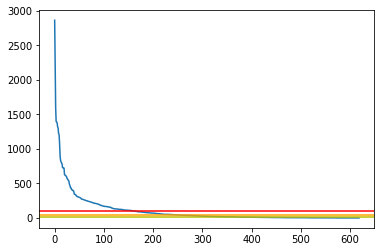

In [0]:
# hay 619 vecindarios
y = list(df_tr['neighbourhood'].value_counts())
plt.plot(range(len(y)),y)
plt.axhline(y=10, color = 'y')
plt.axhline(y=50, color = 'orange')
plt.axhline(y=100, color = 'r')

In [0]:
y = y[50:]

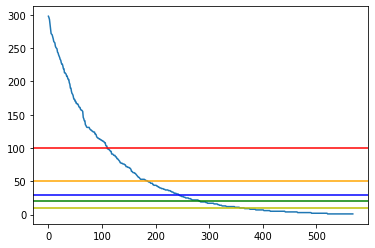

In [0]:
plt.plot(range(len(y)),y)
plt.axhline(y=10, color = 'y')
plt.axhline(y=20, color = 'g')
plt.axhline(y=30, color = 'b')
plt.axhline(y=50, color = 'orange')
plt.axhline(y=100, color = 'r')

In [0]:
import numpy as np

aux = np.array(y)
treshold = [1,2,3,5,10,20,30,50,100]
for t in treshold:
  print('Para treshold {0} se tienen {1} clases y {2} ejemplos borrados'.format(t,len(aux[aux<=t]),sum(aux[aux<=t])))


Para treshold 1 se tienen 48 clases y 48 ejemplos borrados
Para treshold 2 se tienen 78 clases y 108 ejemplos borrados
Para treshold 3 se tienen 104 clases y 186 ejemplos borrados
Para treshold 5 se tienen 155 clases y 418 ejemplos borrados
Para treshold 10 se tienen 212 clases y 863 ejemplos borrados
Para treshold 20 se tienen 287 clases y 1973 ejemplos borrados
Para treshold 30 se tienen 326 clases y 2929 ejemplos borrados
Para treshold 50 se tienen 384 clases y 5220 ejemplos borrados
Para treshold 100 se tienen 459 clases y 10630 ejemplos borrados


In [0]:
df_tr.describe

<bound method NDFrame.describe of              id  log_price  ... ammenity_123 ammenity_125
0       6901257   5.010635  ...            0            0
1       6304928   5.129899  ...            0            0
2       7919400   4.976734  ...            0            0
3      13418779   6.620073  ...            0            0
4       3808709   4.744932  ...            0            1
...         ...        ...  ...          ...          ...
74106  14549287   4.605170  ...            0            0
74107  13281809   5.043425  ...            0            0
74108  18688039   5.220356  ...            0            1
74109  17045948   5.273000  ...            0            0
74110   3534845   4.852030  ...            0            0

[74111 rows x 85 columns]>

In [0]:
labels = df_tr['neighbourhood'].value_counts().index
values = df_tr['neighbourhood'].value_counts()

for i in range(len(values)):
  if values[i]<=5:
    break

del_clas = list(labels[i:])
print(del_clas)

['Rosebank', 'Morris Park', 'Spuyten Duyvil', 'Great Kills', 'Tottenville', 'New Brighton', 'Duarte', 'Armour Square', 'Congress Heights', 'Ivy City', 'Westerleigh', 'Eltingville', 'Edenwald', 'McKinley Park', 'Eastland Gardens', 'Good Hope', 'Montebello', 'Randle Highlands', 'Sea Cliff', 'Benning Heights', 'Westmont', 'Hawaiian Gardens', 'Hermosa', 'Daly City', 'West Puente Valley', 'East Corner', 'South Whittier', 'Gallaudet', 'Grasmere', 'Concord', 'Washington Park', 'Douglass', 'Washington Highlands', 'South San Gabriel', 'Morgan Park', 'Meiers Corners', 'Naylor Gardens', 'Bradbury', 'Bergen Beach', 'Fort Dupont', 'North Park', 'Grymes Hill', 'West Lawn', 'St. Elizabeths', 'Randall Manor', 'Queens', 'Willowbrook', 'Austin', 'Belmont', 'West Farms', 'Lindenwood', 'Bellevue', 'Winthrop', 'La Puente', 'Port Richmond', 'Arleta', 'Greenway', 'Fort Davis', 'Chatham', 'Huntington Park', 'South Gate', 'Baldwin Park', 'Fresh Meadows', 'Beverly', 'Marine Park', 'Co-op City', 'West Elsdon', '

In [0]:
for c in del_clas:
  df_tr = df_tr[df_tr.neighbourhood != c]

df_tr.describe

<bound method NDFrame.describe of              id  log_price  ... ammenity_123 ammenity_125
0       6901257   5.010635  ...            0            0
1       6304928   5.129899  ...            0            0
2       7919400   4.976734  ...            0            0
3      13418779   6.620073  ...            0            0
4       3808709   4.744932  ...            0            1
...         ...        ...  ...          ...          ...
74106  14549287   4.605170  ...            0            0
74107  13281809   5.043425  ...            0            0
74108  18688039   5.220356  ...            0            1
74109  17045948   5.273000  ...            0            0
74110   3534845   4.852030  ...            0            0

[73693 rows x 85 columns]>

In [0]:
print(df_tr.isna().sum().sort_values(ascending=False))

host_response_rate      18217
review_scores_rating    16591
first_review            15741
last_review             15704
neighbourhood            6872
                        ...  
ammenity_66                 0
ammenity_70                 0
ammenity_72                 0
ammenity_74                 0
id                          0
Length: 85, dtype: int64


In [0]:
df_tr = df_tr.drop(columns=['id','zipcode','host_response_rate', 'review_scores_rating', 'first_review', 'last_review'])
df_tr.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,bedrooms,beds,ammenity_1,ammenity_2,ammenity_3,ammenity_4,ammenity_7,ammenity_8,ammenity_9,ammenity_10,ammenity_12,ammenity_14,ammenity_15,ammenity_16,ammenity_19,ammenity_22,ammenity_25,ammenity_27,ammenity_29,ammenity_34,ammenity_38,ammenity_40,ammenity_48,ammenity_49,ammenity_50,ammenity_51,ammenity_52,ammenity_54,ammenity_55,ammenity_57,ammenity_58,ammenity_60,ammenity_63,ammenity_64,ammenity_66,ammenity_70,ammenity_72,ammenity_74,ammenity_77,ammenity_79,ammenity_80,ammenity_85,ammenity_86,ammenity_87,ammenity_91,ammenity_94,ammenity_95,ammenity_97,ammenity_98,ammenity_100,ammenity_101,ammenity_102,ammenity_105,ammenity_106,ammenity_112,ammenity_113,ammenity_115,ammenity_117,ammenity_119,ammenity_121,ammenity_123,ammenity_125
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,2012-03-26,f,40.696524,-73.991617,Brooklyn Heights,2,1.0,1.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,2017-06-19,t,40.766115,-73.989040,Hell's Kitchen,6,3.0,3.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,2016-10-25,t,40.808110,-73.943756,Harlem,10,1.0,3.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,2015-04-19,f,37.772004,-122.431619,Lower Haight,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,2015-03-01,t,38.925627,-77.034596,Columbia Heights,4,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Ahora transformaremos todas las variables categoricas restantes a una representación en _one hot vector_. Para esto odemos utilizar la función `to_categorical` propuesta por keras. Puede apoyarse de las lineas de código abajo. No olvide eliminar las columnas originales del _dataframe_.

Por último, en este caso optaremos por eliminar las columnas correspondientes a alguna fecha, pues no resultan significativas para el problema y la cantidad de variables disponibles son suficientes para hacer una exploración de las redes densas. 

In [0]:
from keras.utils import to_categorical

cat_col = list(set(cat_col)-set(['id','zipcode','host_response_rate', 'review_scores_rating', 'first_review', 'last_review']))
print(cat_col)

for col in cat_col:
    onehot = to_categorical(df_tr[col].astype('category').cat.codes)
    df_tr[[col + '_' + str(i) for i in range(onehot.shape[1])]] = pd.DataFrame(onehot)
    
df_tr = df_tr.drop(columns=cat_col)
df_tr = df_tr.drop(columns=['host_since'])
df_tr.head()

Using TensorFlow backend.


['cancellation_policy', 'city', 'instant_bookable', 'host_identity_verified', 'room_type', 'host_has_profile_pic', 'neighbourhood', 'bed_type', 'cleaning_fee', 'property_type']


,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,bedrooms,beds,ammenity_1,ammenity_2,ammenity_3,ammenity_4,ammenity_7,ammenity_8,ammenity_9,ammenity_10,ammenity_12,ammenity_14,ammenity_15,ammenity_16,ammenity_19,ammenity_22,ammenity_25,ammenity_27,ammenity_29,ammenity_34,ammenity_38,ammenity_40,ammenity_48,ammenity_49,ammenity_50,ammenity_51,ammenity_52,ammenity_54,ammenity_55,ammenity_57,ammenity_58,ammenity_60,ammenity_63,ammenity_64,...,bed_type_2,bed_type_3,bed_type_4,cleaning_fee_0,cleaning_fee_1,property_type_0,property_type_1,property_type_2,property_type_3,property_type_4,property_type_5,property_type_6,property_type_7,property_type_8,property_type_9,property_type_10,property_type_11,property_type_12,property_type_13,property_type_14,property_type_15,property_type_16,property_type_17,property_type_18,property_type_19,property_type_20,property_type_21,property_type_22,property_type_23,property_type_24,property_type_25,property_type_26,property_type_27,property_type_28,property_type_29,property_type_30,property_type_31,property_type_32,property_type_33,property_type_34
0,5.010635,3,1.0,40.696524,-73.991617,2,1.0,1.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.129899,7,1.0,40.766115,-73.989040,6,3.0,3.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.976734,5,1.0,40.808110,-73.943756,10,1.0,3.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.620073,4,1.0,37.772004,-122.431619,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.744932,2,1.0,38.925627,-77.034596,4,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_tr.describe

<bound method NDFrame.describe of        log_price  accommodates  ...  property_type_33  property_type_34
0       5.010635             3  ...               0.0               0.0
1       5.129899             7  ...               0.0               0.0
2       4.976734             5  ...               0.0               0.0
3       6.620073             4  ...               0.0               0.0
4       4.744932             2  ...               0.0               0.0
...          ...           ...  ...               ...               ...
74106   4.605170             1  ...               NaN               NaN
74107   5.043425             4  ...               NaN               NaN
74108   5.220356             5  ...               NaN               NaN
74109   5.273000             2  ...               NaN               NaN
74110   4.852030             4  ...               NaN               NaN

[73693 rows x 594 columns]>

In [0]:
df_tr = df_tr.fillna(0)
print(df_tr.isna().sum().sort_values(ascending=False))

property_type_34     0
neighbourhood_115    0
neighbourhood_113    0
neighbourhood_112    0
neighbourhood_111    0
                    ..
neighbourhood_307    0
neighbourhood_306    0
neighbourhood_305    0
neighbourhood_304    0
log_price            0
Length: 594, dtype: int64


#### Procedimiento
En este punto se borraron las categorias con gran cantidad de datos nulos, además de pasar a one hot vector las variables categóricas que no fueron eliminadas, además se eliminaron unas cuantas columnas para reducir la dimensionalidad, a través del número de clases, por medio del vecindario. Esto se hizo a través de eliminar las filas que tuvieran algun vecindario que se repitiera 5 veces o menos en todos los datos, bajando en 150 la dimensión de la representasión.

### 1.d Estandarización y Train Test Split
En esta pregunta nos ocuparemos de separar el _dataset_ en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular las funciones `StandarScaler` y `train_test_split`.

Para esto separe primero el dataset en $X$ e $Y$. Luego separe los datos considerando un $70\%$ de ellos para entrenamiento, un $20\%$ para validación y un $10\%$ para test. Finalmente ajuste los _scalers_ con los datos de entrenamiento y transforme los datos. 

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 
- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 
- ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df_tr.copy()

y = np.array(df['log_price'].tolist())

X = df.drop(columns=['log_price'])

X_tr, X_t, y_tr, y_t = train_test_split(X,y, test_size=0.3, random_state=8)
X_test, X_val, y_test, y_val = train_test_split(X_t,y_t, test_size=0.33, random_state=8)

scaler_x = StandardScaler()
scaler_x.fit(X_tr)
X_tr = scaler_x.transform(X_tr)
X_val = scaler_x.transform(X_val)
X_test = scaler_x.transform(X_test)

print(X_tr.shape, X_test.shape, X_val.shape)
print(y_tr.shape, y_test.shape, y_val.shape)

(51585, 593) (14812, 593) (7296, 593)
(51585,) (14812,) (7296,)


In [0]:
print(X_val)
print("************")
print(y_val)

[[ 0.38932125  0.45605074 -1.4397551  ... -0.01392452 -0.05084224
  -0.00880613]
 [-0.53642488 -0.39715266  0.75739826 ... -0.01392452 -0.05084224
  -0.00880613]
 [-0.53642488 -0.39715266  0.74168472 ... -0.01392452 -0.05084224
  -0.00880613]
 ...
 [-0.53642488 -0.39715266  0.14673444 ... -0.01392452 -0.05084224
  -0.00880613]
 [-0.53642488 -0.39715266 -1.42379524 ... -0.01392452 -0.05084224
  -0.00880613]
 [-0.53642488 -0.39715266  0.70777237 ... -0.01392452 -0.05084224
  -0.00880613]]
************
[5.0689042  4.07753744 4.31748811 ... 5.19295685 5.69035945 4.44265126]


#### Estandarización de los datos
Se separa losd atos en testing, validation y training. Además se estandarizan, centrando losd atos con la media y escalando con la desviación estandar, es decir, (x-u)/s. La estandarización se hace en base a los datos de entrenamiento porque se supone que se entrena para que generalice para cualquier dato, y como la red fue entrenada bajo ese intervalo y transformación, para comprobar su generalización debe usarse de igual manera. Además, si hubiera algunos outlier en los datos, esto afectaría en mayor medida a los test y val, generando una transformacion muy diferente a la cual fue entrenado el modelo. 

Los datos de entrenamientos sirven para que la red aprende a generalizar, mientras que los de validación son para sintonizar los parámetros de la red y por último, los de testing son para cuantificar la calidad de generalización de la red.

### 1.e Primera Red
En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Esta libreria puede conectarse a distintos _backend_ que proveen el _framework_ para realizar efectivamente las operaciones necesarias por la red. Los más usuales son _TensorFlow_ y _Theano_, sin embargo en el último tiempo _TensorFlow_ ha tenido una gran adopción por diversos motivos, por lo cual la recomendación es instalar y utilizar TensorFlow. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciaran estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Mean Square Error_ para obtener resultados comparables entre distintos modelos. Para entrenar esta red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_. 

Construya la red basandose en el código y la documentación de keras. 

In [0]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2

model = Sequential()

# Hidden Layer
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(1))

model.compile(loss='mse',optimizer=SGD(lr=0.0002))

Una forma fácil de instanciar la red es la propuesta en el codigo abajo, es decir entrenar la red por 0 _epochs_. Una red instanciada nos permite utilizar el método `.summary` para ver su número de parametros y los tamaños de cada capa. 

Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

In [0]:
model.fit(X_tr, y_tr, epochs=0)
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               152064    
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 152,321
Trainable params: 152,321
Non-trainable params: 0
_________________________________________________________________


Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [0]:
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_test,y_test))

Train on 51585 samples, validate on 14812 samples
Epoch 1/20
51585/51585 [==============================] - 6s 109us/step - loss: 4.1960 - val_loss: 1.3620
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.8036 - val_loss: 0.5829
Epoch 3/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.5087 - val_loss: 0.5046
Epoch 4/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.4649 - val_loss: 0.4829
Epoch 5/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.4451 - val_loss: 0.4683
Epoch 6/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.4308 - val_loss: 0.4579
Epoch 7/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.4190 - val_loss: 0.4504
Epoch 8/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.4095 - val_loss: 0.4415
Epoch 9/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.4007 - val_loss: 0.43

KeyError: ignored

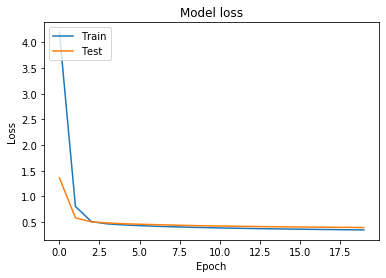

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos dos valores mayores y dos valores menores al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _calback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

Grafique el comportamiento de los errores de validación y entrenamiento para a lo menos un valor mayor y uno menor al original y comente.

In [0]:
from keras.callbacks import TerminateOnNaN

LR = [0.2,0.02,0.0002,0.00002]

for lr in LR:
  print("LR ",lr)
  model = Sequential()
  model.add(Dense(256,activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse',optimizer=SGD(lr=lr))
  history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_test,y_test),callbacks=[TerminateOnNaN()])


LR  0.2
Train on 51585 samples, validate on 14812 samples
Epoch 1/20
   32/51585 [..............................] - ETA: 11:57 - loss: 26.9446Batch 3: Invalid loss, terminating training
LR  0.02
Train on 51585 samples, validate on 14812 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras/utils/generic_utils.py:367: RuntimeWarning: invalid value encountered in multiply
  self._values[k][0] += v * (current - self._seen_so_far)
/usr/local/lib/python3.6/dist-packages/keras/utils/generic_utils.py:367: RuntimeWarning: invalid value encountered in double_scalars
  self._values[k][0] += v * (current - self._seen_so_far)


   32/51585 [..............................] - ETA: 14:02 - loss: 19.6120Batch 10: Invalid loss, terminating training
LR  0.0002
Train on 51585 samples, validate on 14812 samples
Epoch 1/20
51585/51585 [==============================] - 6s 112us/step - loss: 4.4599 - val_loss: 1.5419
Epoch 2/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.8759 - val_loss: 0.5925
Epoch 3/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.5145 - val_loss: 0.4940
Epoch 4/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.4618 - val_loss: 0.4699
Epoch 5/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.4404 - val_loss: 0.4531
Epoch 6/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.4256 - val_loss: 0.4419
Epoch 7/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.4138 - val_loss: 0.4340
Epoch 8/20
51585/51585 [==============================] - 5s 101us/step - loss: 0

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
history1 = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_test,y_test),callbacks=[TerminateOnNaN()])

model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer=SGD(lr=0.00002))
history2 = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_test,y_test),callbacks=[TerminateOnNaN()])

Train on 51585 samples, validate on 14812 samples
Epoch 1/20
51585/51585 [==============================] - 6s 116us/step - loss: 4.4371 - val_loss: 1.6314
Epoch 2/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.9454 - val_loss: 0.6313
Epoch 3/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.5295 - val_loss: 0.5119
Epoch 4/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.4677 - val_loss: 0.4805
Epoch 5/20
51585/51585 [==============================] - 5s 106us/step - loss: 0.4436 - val_loss: 0.4662
Epoch 6/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.4281 - val_loss: 0.4525
Epoch 7/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.4162 - val_loss: 0.4423
Epoch 8/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.4063 - val_loss: 0.4343
Epoch 9/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.3979 - val_loss: 0.4

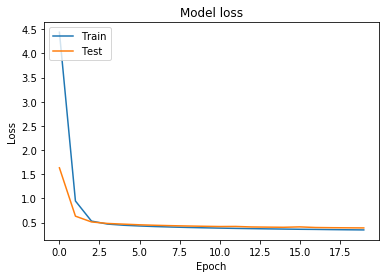

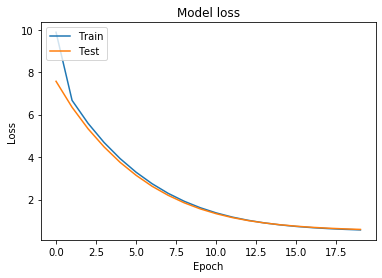

In [0]:
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 1.f Activación y regularizadores $l$1 $l$2
En esta pregunta se les propone explorar distintas funciones de activación o de regularización usual. Por lo extenso de la tarea se les propone elegir una de las dos exploraciones. En ambos casos deben entrenar la misma red entrenada anteriormente utilizando gradiente descendente con algun _learn rate_ que les parezca adecuado luego de la exploración en la pregunta anterior. 

* En caso de elegir explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, _softmax_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* En caso de elegir explorar las funciones de regularización usual, agregue regularización $l$1 o $l$2 a la capa oculta y pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

**Independiente de la opción elegida**, comente sobre los siguientes temas:

¿Cual es el interez de tener activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta? ¿Qué pasaría si usaramos esta activación en la capa de salida? 

¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones. 

Rate  0.0001
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 6s 120us/step - loss: 4.9792 - val_loss: 2.2668
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 1.4490 - val_loss: 1.2203
Epoch 3/20
51585/51585 [==============================] - 5s 99us/step - loss: 1.0891 - val_loss: 1.1093
Epoch 4/20
51585/51585 [==============================] - 5s 97us/step - loss: 1.0339 - val_loss: 1.0859
Epoch 5/20
51585/51585 [==============================] - 5s 97us/step - loss: 1.0109 - val_loss: 1.0593
Epoch 6/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.9936 - val_loss: 1.0438
Epoch 7/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.9797 - val_loss: 1.0326
Epoch 8/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.9677 - val_loss: 1.0220
Epoch 9/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.9571 - val_loss:

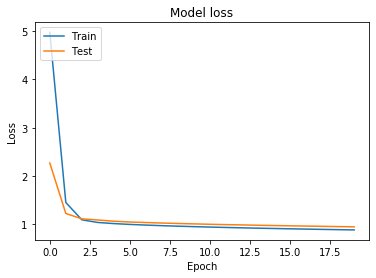

Rate  0.001
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 6s 120us/step - loss: 10.3571 - val_loss: 7.6468
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 6.3649 - val_loss: 6.3159
Epoch 3/20
51585/51585 [==============================] - 5s 98us/step - loss: 5.7202 - val_loss: 5.9493
Epoch 4/20
51585/51585 [==============================] - 5s 98us/step - loss: 5.4333 - val_loss: 5.6815
Epoch 5/20
51585/51585 [==============================] - 5s 98us/step - loss: 5.1967 - val_loss: 5.4430
Epoch 6/20
51585/51585 [==============================] - 5s 99us/step - loss: 4.9795 - val_loss: 5.2197
Epoch 7/20
51585/51585 [==============================] - 5s 99us/step - loss: 4.7762 - val_loss: 5.0090
Epoch 8/20
51585/51585 [==============================] - 5s 97us/step - loss: 4.5846 - val_loss: 4.8111
Epoch 9/20
51585/51585 [==============================] - 5s 98us/step - loss: 4.4033 - val_loss:

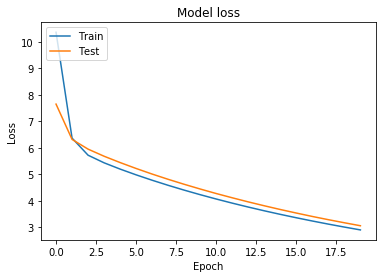

Rate  0.01
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 6s 121us/step - loss: 51.8050 - val_loss: 42.2578
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 32.1959 - val_loss: 27.7087
Epoch 3/20
51585/51585 [==============================] - 5s 98us/step - loss: 21.5323 - val_loss: 18.8132
Epoch 4/20
51585/51585 [==============================] - 5s 99us/step - loss: 14.7874 - val_loss: 13.0355
Epoch 5/20
51585/51585 [==============================] - 5s 98us/step - loss: 10.3706 - val_loss: 9.2185
Epoch 6/20
51585/51585 [==============================] - 5s 98us/step - loss: 7.4358 - val_loss: 6.6759
Epoch 7/20
51585/51585 [==============================] - 5s 99us/step - loss: 5.4676 - val_loss: 4.9613
Epoch 8/20
51585/51585 [==============================] - 5s 98us/step - loss: 4.1334 - val_loss: 3.7936
Epoch 9/20
51585/51585 [==============================] - 5s 99us/step - loss: 3.2170 - va

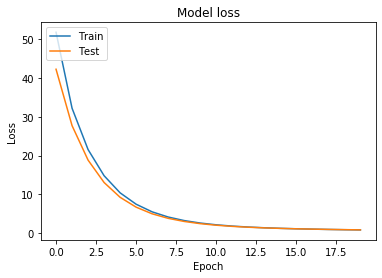

Rate  0.1
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 6s 121us/step - loss: 160.4742 - val_loss: 20.4581
Epoch 2/20
51585/51585 [==============================] - 5s 99us/step - loss: 10.7366 - val_loss: 6.0102
Epoch 3/20
51585/51585 [==============================] - 5s 98us/step - loss: 4.2445 - val_loss: 3.0798
Epoch 4/20
51585/51585 [==============================] - 5s 98us/step - loss: 2.3508 - val_loss: 1.8570
Epoch 5/20
51585/51585 [==============================] - 5s 98us/step - loss: 1.4844 - val_loss: 1.2427
Epoch 6/20
51585/51585 [==============================] - 5s 99us/step - loss: 1.0333 - val_loss: 0.9095
Epoch 7/20
51585/51585 [==============================] - 5s 97us/step - loss: 0.7851 - val_loss: 0.7225
Epoch 8/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.6453 - val_loss: 0.6172
Epoch 9/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.5663 - val_loss

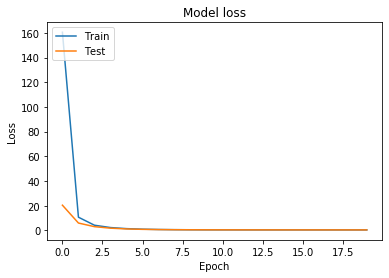

In [0]:
# regularizer
from keras.regularizers import l1, l2

rate = [0.0001,0.001,0.01,0.1]

for r in rate:
  print('Rate ',r)
  model = Sequential()
  model.add(Dense(256,activation='relu',activity_regularizer=l2(r)))
  model.add(Dense(1))
  model.compile(loss='mse',optimizer=SGD(lr=0.0002))
  history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))
  
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Rate  0.0001
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 6s 123us/step - loss: 4.5271 - val_loss: 1.7777
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 1.1490 - val_loss: 0.9165
Epoch 3/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.8462 - val_loss: 0.8291
Epoch 4/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.7995 - val_loss: 0.8043
Epoch 5/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.7793 - val_loss: 0.7888
Epoch 6/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.7650 - val_loss: 0.7773
Epoch 7/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.7537 - val_loss: 0.7694
Epoch 8/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.7444 - val_loss: 0.7600
Epoch 9/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.7364 - val_loss

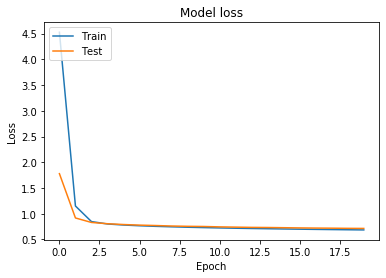

Rate  0.001
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 128us/step - loss: 8.2273 - val_loss: 5.3083
Epoch 2/20
51585/51585 [==============================] - 5s 100us/step - loss: 4.3643 - val_loss: 4.0357
Epoch 3/20
51585/51585 [==============================] - 5s 101us/step - loss: 3.8754 - val_loss: 3.8696
Epoch 4/20
51585/51585 [==============================] - 5s 101us/step - loss: 3.7761 - val_loss: 3.8028
Epoch 5/20
51585/51585 [==============================] - 5s 103us/step - loss: 3.7171 - val_loss: 3.7501
Epoch 6/20
51585/51585 [==============================] - 5s 100us/step - loss: 3.6657 - val_loss: 3.7023
Epoch 7/20
51585/51585 [==============================] - 5s 101us/step - loss: 3.6175 - val_loss: 3.6577
Epoch 8/20
51585/51585 [==============================] - 5s 101us/step - loss: 3.5711 - val_loss: 3.6133
Epoch 9/20
51585/51585 [==============================] - 5s 101us/step - loss: 3.5262 - va

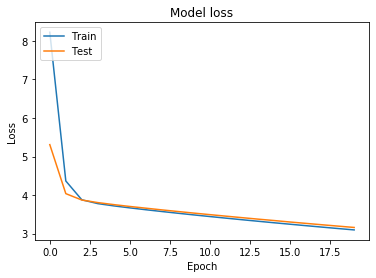

Rate  0.01
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 6s 126us/step - loss: 36.9258 - val_loss: 32.9749
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 29.9799 - val_loss: 28.4789
Epoch 3/20
51585/51585 [==============================] - 5s 99us/step - loss: 26.2670 - val_loss: 25.2182
Epoch 4/20
51585/51585 [==============================] - 5s 99us/step - loss: 23.2088 - val_loss: 22.3547
Epoch 5/20
51585/51585 [==============================] - 5s 101us/step - loss: 20.5004 - val_loss: 19.8122
Epoch 6/20
51585/51585 [==============================] - 5s 99us/step - loss: 18.0945 - val_loss: 17.5573
Epoch 7/20
51585/51585 [==============================] - 5s 100us/step - loss: 15.9666 - val_loss: 15.5635
Epoch 8/20
51585/51585 [==============================] - 5s 100us/step - loss: 14.0920 - val_loss: 13.8114
Epoch 9/20
51585/51585 [==============================] - 5s 100us/step - loss: 

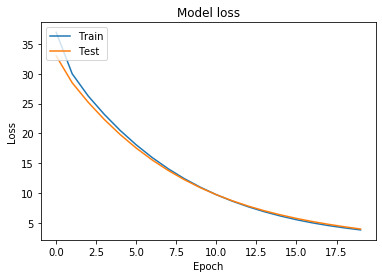

Rate  0.1
Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 128us/step - loss: 199.9939 - val_loss: 102.9538
Epoch 2/20
51585/51585 [==============================] - 5s 98us/step - loss: 57.8841 - val_loss: 35.5426
Epoch 3/20
51585/51585 [==============================] - 5s 99us/step - loss: 20.7931 - val_loss: 15.5330
Epoch 4/20
51585/51585 [==============================] - 5s 99us/step - loss: 8.9243 - val_loss: 7.7546
Epoch 5/20
51585/51585 [==============================] - 5s 97us/step - loss: 4.2846 - val_loss: 4.1874
Epoch 6/20
51585/51585 [==============================] - 5s 98us/step - loss: 2.2659 - val_loss: 2.3811
Epoch 7/20
51585/51585 [==============================] - 5s 98us/step - loss: 1.3557 - val_loss: 1.4752
Epoch 8/20
51585/51585 [==============================] - 5s 99us/step - loss: 0.9550 - val_loss: 1.0074
Epoch 9/20
51585/51585 [==============================] - 5s 98us/step - loss: 0.7761 - val_

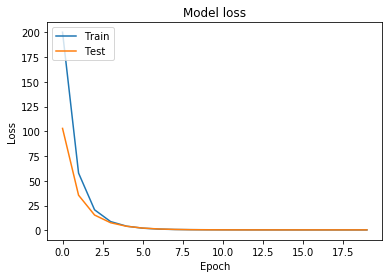

In [0]:
for r in rate:
  print('Rate ',r)
  model = Sequential()
  model.add(Dense(256,activation='relu',activity_regularizer=l1(r)))
  model.add(Dense(1))
  model.compile(loss='mse',optimizer=SGD(lr=0.0002))
  history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))
  
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 133us/step - loss: 4.4269 - val_loss: 1.5341
Epoch 2/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.8840 - val_loss: 0.5945
Epoch 3/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.5326 - val_loss: 0.4967
Epoch 4/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.4791 - val_loss: 0.4684
Epoch 5/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.4574 - val_loss: 0.4540
Epoch 6/20
51585/51585 [==============================] - 5s 100us/step - loss: 0.4427 - val_loss: 0.4430
Epoch 7/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.4312 - val_loss: 0.4356
Epoch 8/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.4216 - val_loss: 0.4306
Epoch 9/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.4134 - val_loss: 0.42

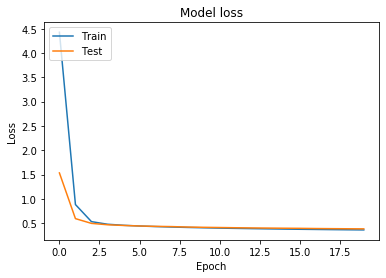

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 136us/step - loss: 4.6237 - val_loss: 1.7915
Epoch 2/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.9848 - val_loss: 0.6967
Epoch 3/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.5914 - val_loss: 0.5786
Epoch 4/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.5324 - val_loss: 0.5458
Epoch 5/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.5098 - val_loss: 0.5275
Epoch 6/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.4952 - val_loss: 0.5159
Epoch 7/20
51585/51585 [==============================] - 5s 104us/step - loss: 0.4843 - val_loss: 0.5065
Epoch 8/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.4752 - val_loss: 0.4991
Epoch 9/20
51585/51585 [==============================] - 5s 104us/step - loss: 0.4675 - val_loss: 0.49

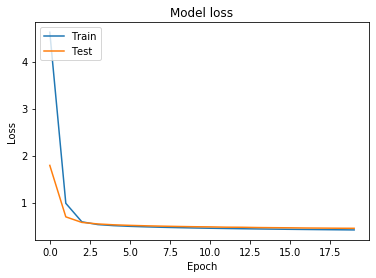

In [0]:
# L1
model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# L2
model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activity_regularizer=l2(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 138us/step - loss: 200.6121 - val_loss: 103.4903
Epoch 2/20
51585/51585 [==============================] - 5s 106us/step - loss: 58.0519 - val_loss: 35.4435
Epoch 3/20
51585/51585 [==============================] - 5s 105us/step - loss: 20.8089 - val_loss: 15.4736
Epoch 4/20
51585/51585 [==============================] - 6s 107us/step - loss: 9.0167 - val_loss: 7.8086
Epoch 5/20
51585/51585 [==============================] - 6s 107us/step - loss: 4.3637 - val_loss: 4.2715
Epoch 6/20
51585/51585 [==============================] - 5s 102us/step - loss: 2.3136 - val_loss: 2.4716
Epoch 7/20
51585/51585 [==============================] - 5s 102us/step - loss: 1.3815 - val_loss: 1.5348
Epoch 8/20
51585/51585 [==============================] - 5s 103us/step - loss: 0.9711 - val_loss: 1.0476
Epoch 9/20
51585/51585 [==============================] - 5s 104us/step - loss: 0.7863 - val_lo

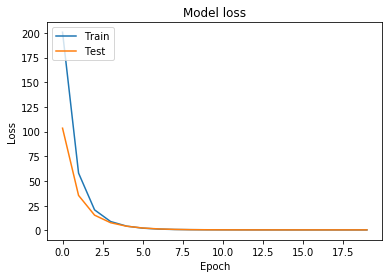

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 137us/step - loss: 159.9376 - val_loss: 20.4436
Epoch 2/20
51585/51585 [==============================] - 5s 102us/step - loss: 10.8494 - val_loss: 6.1421
Epoch 3/20
51585/51585 [==============================] - 5s 102us/step - loss: 4.3850 - val_loss: 3.1854
Epoch 4/20
51585/51585 [==============================] - 5s 102us/step - loss: 2.4547 - val_loss: 1.9415
Epoch 5/20
51585/51585 [==============================] - 5s 103us/step - loss: 1.5722 - val_loss: 1.3178
Epoch 6/20
51585/51585 [==============================] - 5s 103us/step - loss: 1.1130 - val_loss: 0.9803
Epoch 7/20
51585/51585 [==============================] - 5s 102us/step - loss: 0.8612 - val_loss: 0.7925
Epoch 8/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.7201 - val_loss: 0.6933
Epoch 9/20
51585/51585 [==============================] - 5s 101us/step - loss: 0.6417 - val_loss: 

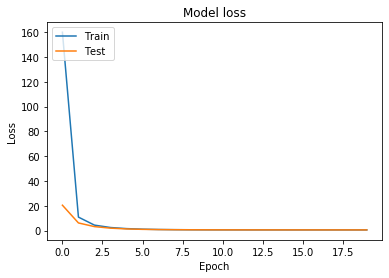

In [0]:
# L1
model = Sequential()
model.add(Dense(256,activation='relu',activity_regularizer=l1(0.1)))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# L2
model = Sequential()
model.add(Dense(256,activation='relu',activity_regularizer=l2(0.1)))
model.add(Dense(1,activity_regularizer=l2(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 1.g Exploración del Número de neuronas

Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrenen la red que estimen conveniente luego de la pregunta anterior, variando el numero de nuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [0]:
import numpy as np
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2

t_error, v_error = [], []

for n_units in range(1,11):

  units = 2**n_units

  # do model 
  model = Sequential()
  model.add(Dense(units,activation='relu'))
  model.add(Dense(1,activity_regularizer=l1(0.0001)))
  model.compile(loss='mse',optimizer=SGD(lr=0.0002))
  
  # train model 
  history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))
  val_error = min(history.history['val_loss'])
  train_error = history.history['loss'][np.argmin(history.history['val_loss'])] 
  print(train_error)

  # for instance  
  t_error.append(train_error)
  v_error.append(val_error)

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 3s 62us/step - loss: 15.2934 - val_loss: 6.5020
Epoch 2/20
51585/51585 [==============================] - 3s 51us/step - loss: 3.8529 - val_loss: 2.1177
Epoch 3/20
51585/51585 [==============================] - 3s 50us/step - loss: 1.4278 - val_loss: 0.9525
Epoch 4/20
51585/51585 [==============================] - 3s 50us/step - loss: 0.7740 - val_loss: 0.6369
Epoch 5/20
51585/51585 [==============================] - 3s 51us/step - loss: 0.5955 - val_loss: 0.5506
Epoch 6/20
51585/51585 [==============================] - 3s 52us/step - loss: 0.5465 - val_loss: 0.5273
Epoch 7/20
51585/51585 [==============================] - 3s 51us/step - loss: 0.5328 - val_loss: 0.5209
Epoch 8/20
51585/51585 [==============================] - 3s 51us/step - loss: 0.5286 - val_loss: 0.5186
Epoch 9/20
51585/51585 [==============================] - 3s 51us/step - loss: 0.5264 - val_loss: 0.5163
Epoch

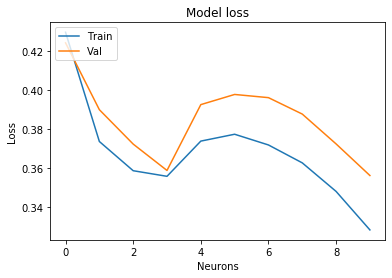

In [0]:
plt.plot(t_error)
plt.plot(v_error)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Neurons')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### 1.h Dropout
Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

In [0]:
from keras.layers import Dropout

t_error1, v_error1 = [], []

for n_units in range(1,11):

  units = 2**n_units

  # do model 
  model = Sequential()
  model.add(Dense(units,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1,activity_regularizer=l1(0.0001)))
  model.compile(loss='mse',optimizer=SGD(lr=0.0002))
  
  # train model 
  history = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))
  val_error = min(history.history['val_loss'])
  train_error = history.history['loss'][np.argmin(history.history['val_loss'])] 
  print(train_error)

  # for instance  
  t_error1.append(train_error)
  v_error1.append(val_error)

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 4s 74us/step - loss: 10.5722 - val_loss: 3.7802
Epoch 2/30
51585/51585 [==============================] - 3s 55us/step - loss: 4.1409 - val_loss: 1.7255
Epoch 3/30
51585/51585 [==============================] - 3s 56us/step - loss: 2.3309 - val_loss: 1.0160
Epoch 4/30
51585/51585 [==============================] - 3s 55us/step - loss: 1.4963 - val_loss: 0.7119
Epoch 5/30
51585/51585 [==============================] - 3s 55us/step - loss: 1.0351 - val_loss: 0.5635
Epoch 6/30
51585/51585 [==============================] - 3s 56us/step - loss: 0.7898 - val_loss: 0.4844
Epoch 7/30
51585/51585 [==============================] - 3s 55us/step - loss: 0.6485 - val_loss: 0.4404
Epoch 8/30
51585/51585 [==============================] - 3s 55us/step - loss: 0.5664 - val_loss: 0.4178
Epoch 9/30
51585/51585 [==============================] - 3s 55us/step - loss: 0.5181 - val_loss: 0.4069
Epoch

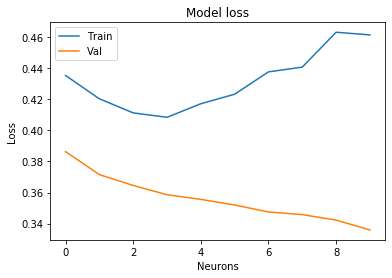

In [0]:
plt.plot(t_error1)
plt.plot(v_error1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Neurons')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### 1.i Extreme Learning Machine

Otra aproximación para obtener modelos grandes que no sobreajustan es la implementada por _ELM_. Explique en qué consiste la idea de _ELM_ y porqué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros. 

Entrene una _ELM_ de una capa fija y una capa oculta, la primera con un número relativamente grande y la segunda con un número relativamente pequeño. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes. 

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 18s 349us/step - loss: 4.3217 - val_loss: 1.4033
Epoch 2/30
51585/51585 [==============================] - 16s 320us/step - loss: 0.7157 - val_loss: 0.4665
Epoch 3/30
51585/51585 [==============================] - 17s 321us/step - loss: 0.4234 - val_loss: 0.3999
Epoch 4/30
51585/51585 [==============================] - 17s 322us/step - loss: 0.3871 - val_loss: 0.4492
Epoch 5/30
51585/51585 [==============================] - 17s 321us/step - loss: 0.3752 - val_loss: 0.3708
Epoch 6/30
51585/51585 [==============================] - 16s 319us/step - loss: 0.3680 - val_loss: 0.3657
Epoch 7/30
51585/51585 [==============================] - 16s 318us/step - loss: 0.3628 - val_loss: 0.3621
Epoch 8/30
51585/51585 [==============================] - 16s 320us/step - loss: 0.3587 - val_loss: 0.3614
Epoch 9/30
51585/51585 [==============================] - 17s 320us/step - loss: 0.3546 - val_l

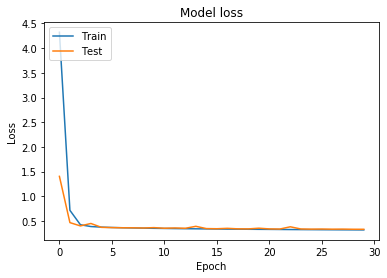

In [0]:
model = Sequential()

model.add(
    Dense(units=5000,
          activation='relu',
         )
)

model.add(Dense(units=32, activation='relu'))
model.add(Dense(1,activity_regularizer=l1(0.0001)))

model.layers[0].trainable = False

model.compile(loss='mse',optimizer=SGD(lr=0.0002))

history = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

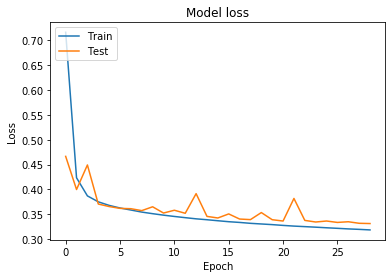

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 1.j Learning Rate Decay
Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

In [0]:
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    aux = lr / (2**(epoch/10))
    if(aux<0.00005):
      return 0.00005
    else:
      return aux

schedule = LearningRateScheduler(step_decay)

# model. # . . . 

model.fit(# . . .
        callbacks=[schedule])

### 1.k Vanishing Gradient

El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

![alt text](https://miro.medium.com/max/3333/1*ONiC8WDSTrYsqjDD9hC-6w.png)

##### Glorot uniform initializer

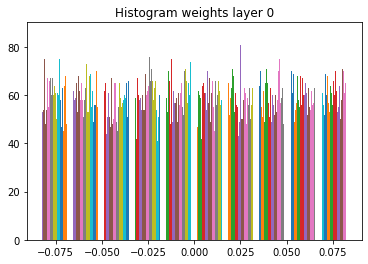

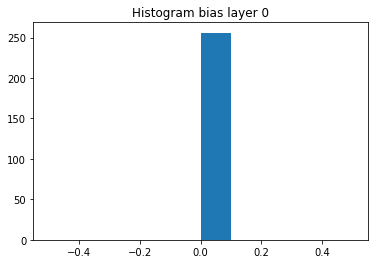

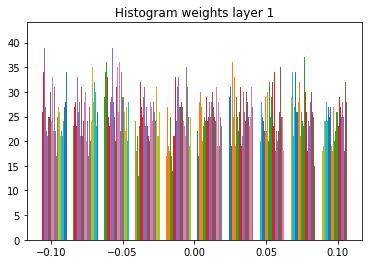

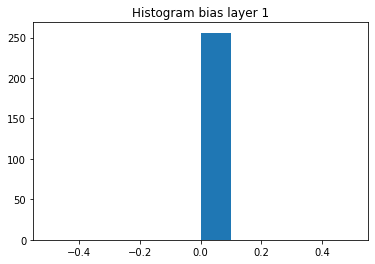

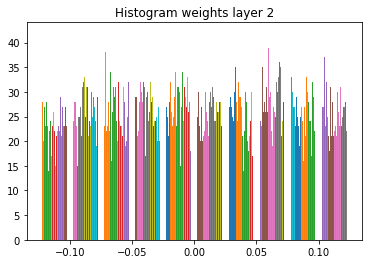

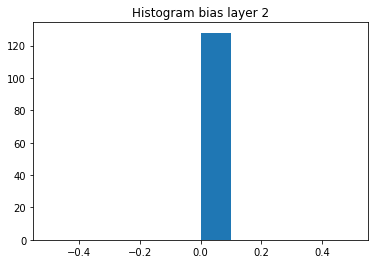

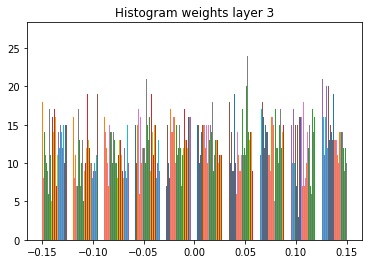

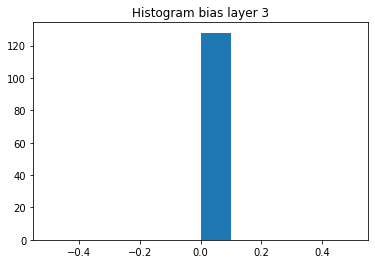

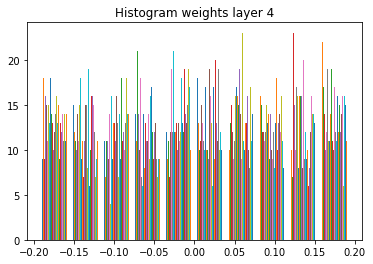

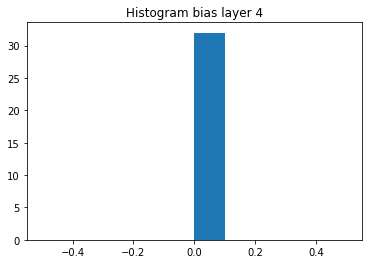

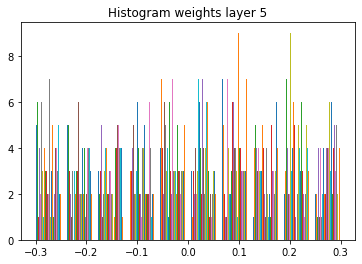

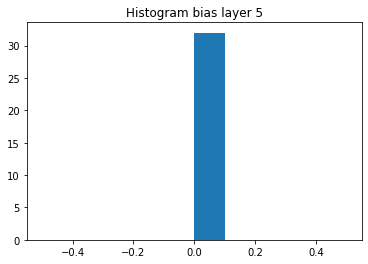

IndexError: ignored

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(256 ,activation='relu'))
model.add(Dense(128 ,activation='relu'))
model.add(Dense(128 ,activation='relu'))
model.add(Dense(32 ,activation='relu'))
model.add(Dense(32 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
model.fit(X_tr,y_tr,epochs=0)

c = 0
for layer in model.layers:
  layer_kernel_weights = layer.get_weights()[0]
  layer_bias_weight = layer.get_weights()[1]
  plt.title("Histogram weights layer "+str(c))
  plt.hist(layer_kernel_weights)
  plt.show()
  plt.title("Histogram bias layer "+str(c))
  plt.hist(layer_bias_weight)
  plt.show()
  c+=1
  # for one layer
  # you can also name your layers and call them by their names if it's less confusing
# . . . 

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 11s 222us/step - loss: 4.6395 - val_loss: 0.8195
Epoch 2/20
51585/51585 [==============================] - 10s 189us/step - loss: 1.5537 - val_loss: 0.5127
Epoch 3/20
51585/51585 [==============================] - 10s 189us/step - loss: 1.3046 - val_loss: 0.4927
Epoch 4/20
51585/51585 [==============================] - 10s 191us/step - loss: 1.1857 - val_loss: 0.4339
Epoch 5/20
51585/51585 [==============================] - 10s 189us/step - loss: 1.1074 - val_loss: 0.4141
Epoch 6/20
51585/51585 [==============================] - 10s 189us/step - loss: 1.0627 - val_loss: 0.4120
Epoch 7/20
51585/51585 [==============================] - 10s 191us/step - loss: 0.9940 - val_loss: 0.4210
Epoch 8/20
51585/51585 [==============================] - 10s 185us/step - loss: 0.9396 - val_loss: 0.3866
Epoch 9/20
51585/51585 [==============================] - 10s 187us/step - loss: 0.8974 - val_l

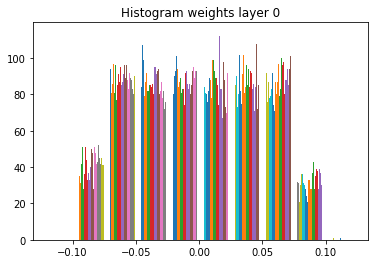

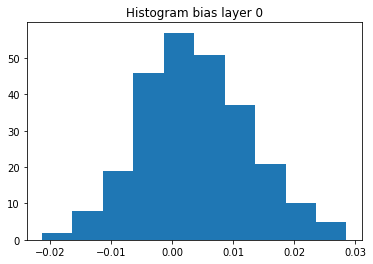

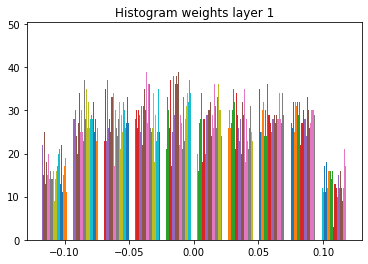

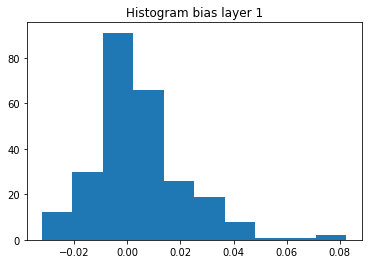

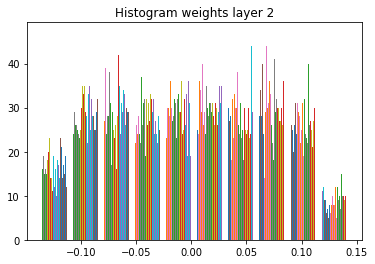

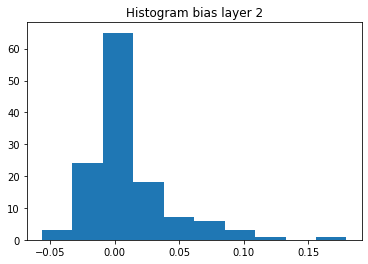

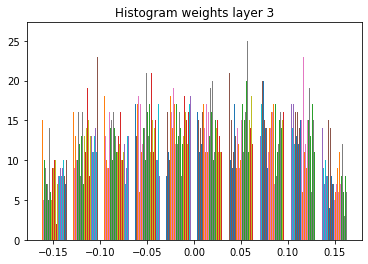

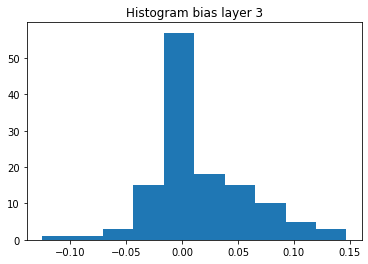

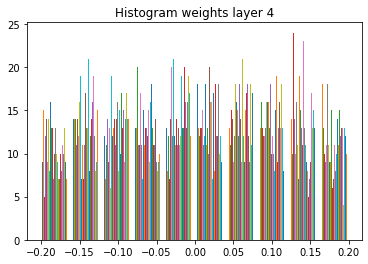

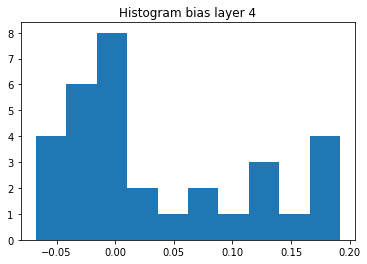

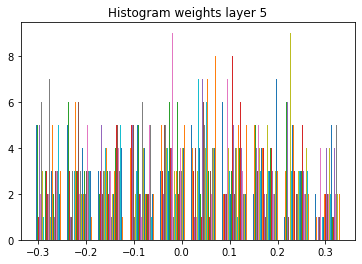

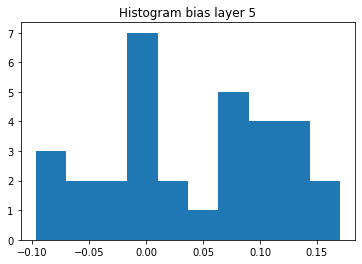

IndexError: ignored

In [0]:
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))
c = 0
for layer in model.layers:
  layer_kernel_weights = layer.get_weights()[0]
  layer_bias_weight = layer.get_weights()[1]
  plt.title("Histogram weights layer "+str(c))
  plt.hist(layer_kernel_weights)
  plt.show()
  plt.title("Histogram bias layer "+str(c))
  plt.hist(layer_bias_weight)
  plt.show()
  c+=1

##### Glorot normal initializer

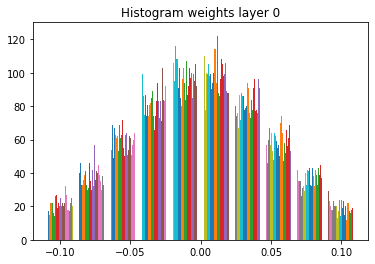

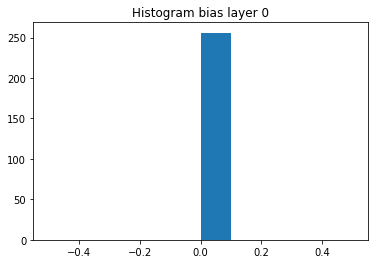

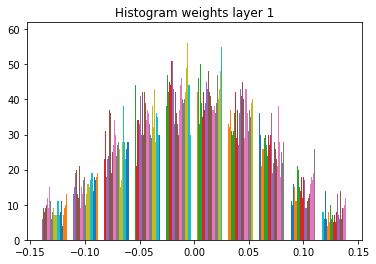

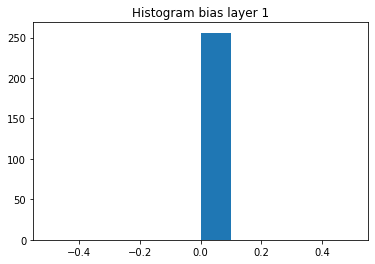

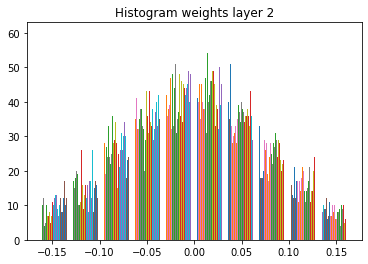

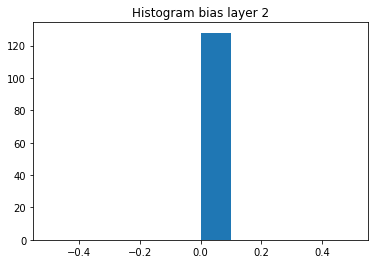

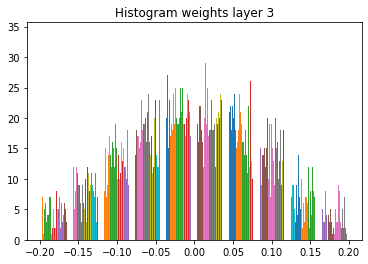

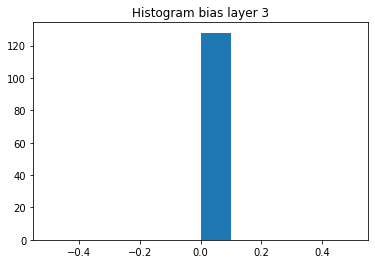

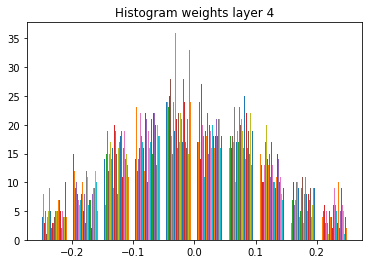

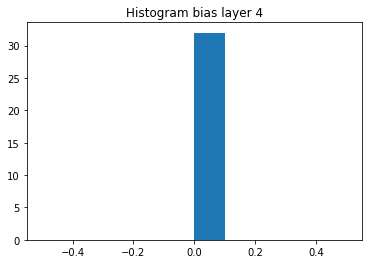

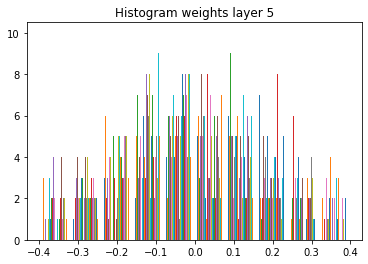

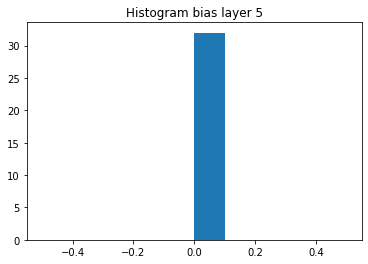

IndexError: ignored

In [0]:
model = Sequential()
model.add(Dense(256,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(256 ,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(128 ,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(128 ,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(32 ,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(32 ,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
model.fit(X_tr,y_tr,epochs=0)

c = 0
for layer in model.layers:
  layer_kernel_weights = layer.get_weights()[0]
  layer_bias_weight = layer.get_weights()[1]
  plt.title("Histogram weights layer "+str(c))
  plt.hist(layer_kernel_weights)
  plt.show()
  plt.title("Histogram bias layer "+str(c))
  plt.hist(layer_bias_weight)
  plt.show()
  c+=1

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 11s 216us/step - loss: 5.0761 - val_loss: 0.9081
Epoch 2/20
51585/51585 [==============================] - 10s 193us/step - loss: 1.8076 - val_loss: 0.7629
Epoch 3/20
51585/51585 [==============================] - 10s 191us/step - loss: 1.4979 - val_loss: 0.4739
Epoch 4/20
51585/51585 [==============================] - 10s 191us/step - loss: 1.3299 - val_loss: 0.4462
Epoch 5/20
51585/51585 [==============================] - 10s 190us/step - loss: 1.2004 - val_loss: 0.4344
Epoch 6/20
51585/51585 [==============================] - 10s 191us/step - loss: 1.1217 - val_loss: 0.4419
Epoch 7/20
51585/51585 [==============================] - 10s 195us/step - loss: 1.0452 - val_loss: 0.4248
Epoch 8/20
51585/51585 [==============================] - 10s 193us/step - loss: 0.9714 - val_loss: 0.3952
Epoch 9/20
51585/51585 [==============================] - 10s 191us/step - loss: 0.9173 - val_l

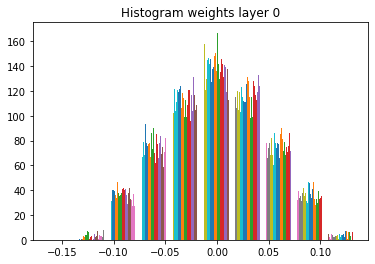

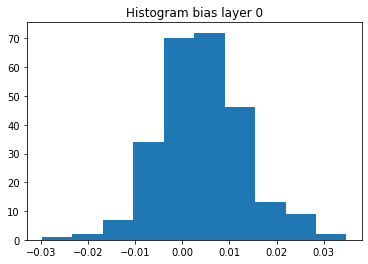

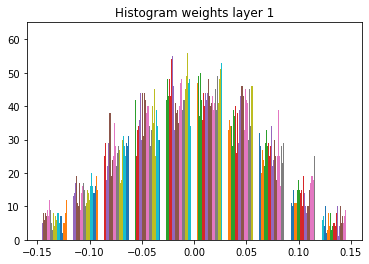

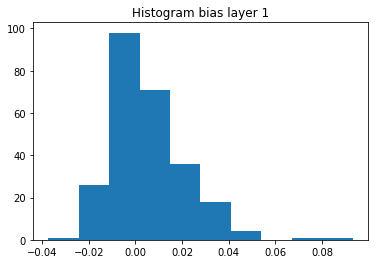

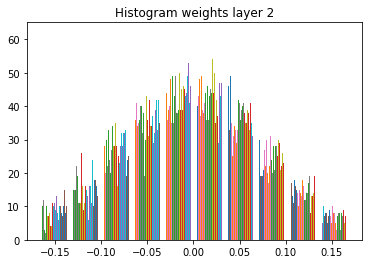

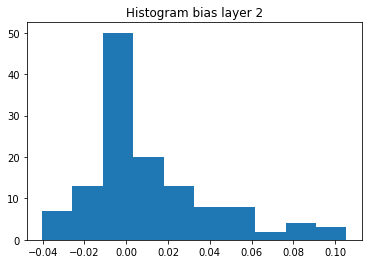

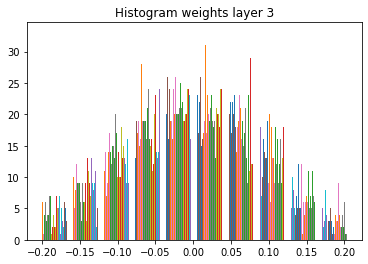

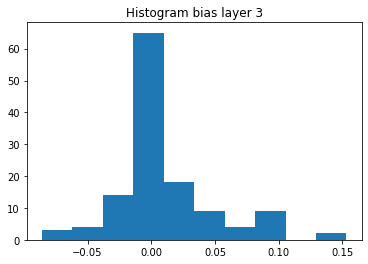

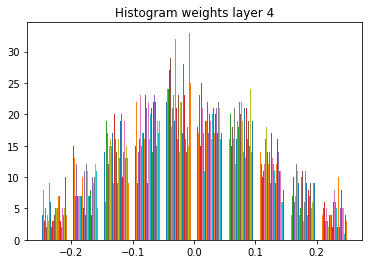

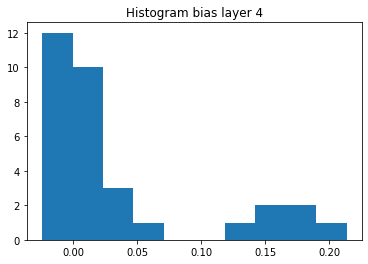

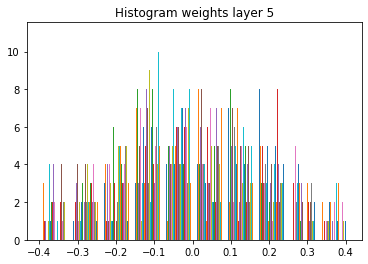

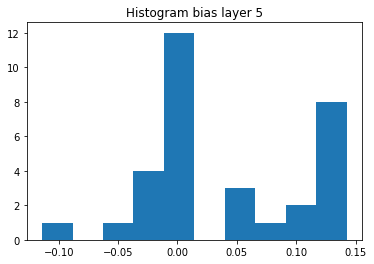

IndexError: ignored

In [0]:
history = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))
c = 0
for layer in model.layers:
  layer_kernel_weights = layer.get_weights()[0]
  layer_bias_weight = layer.get_weights()[1]
  plt.title("Histogram weights layer "+str(c))
  plt.hist(layer_kernel_weights)
  plt.show()
  plt.title("Histogram bias layer "+str(c))
  plt.hist(layer_bias_weight)
  plt.show()
  c+=1

### 1.l Otros Optimizadores

Finalmente, utilizando la estructura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente vainilla. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros) o modificar los parámetros que no hemos utilizado del gradiente descendente (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento, la velocidad de convergencia y el desempeño final alcanzado. Apoyese de gráficos. 

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 6s 115us/step - loss: 8.9479 - val_loss: 2.2797
Epoch 2/30
51585/51585 [==============================] - 4s 78us/step - loss: 2.5157 - val_loss: 0.9820
Epoch 3/30
51585/51585 [==============================] - 4s 82us/step - loss: 1.6665 - val_loss: 0.6709
Epoch 4/30
51585/51585 [==============================] - 4s 85us/step - loss: 1.3290 - val_loss: 0.5666
Epoch 5/30
51585/51585 [==============================] - 4s 75us/step - loss: 1.1285 - val_loss: 0.5021
Epoch 6/30
51585/51585 [==============================] - 4s 79us/step - loss: 0.9910 - val_loss: 0.4630
Epoch 7/30
51585/51585 [==============================] - 4s 75us/step - loss: 0.8998 - val_loss: 0.4363
Epoch 8/30
51585/51585 [==============================] - 4s 75us/step - loss: 0.8103 - val_loss: 0.4170
Epoch 9/30
51585/51585 [==============================] - 4s 77us/step - loss: 0.7511 - val_loss: 0.4052
Epoch

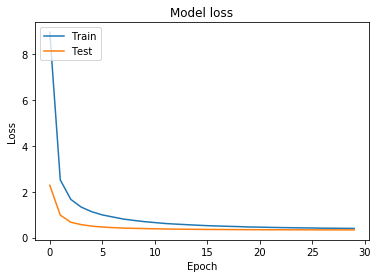

In [0]:
from time import time

# sgd
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
start = time()
history1 = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))
end = time()
time1 = end-start

# Plot training & validation loss values
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 6s 122us/step - loss: 3.8319 - val_loss: 0.4890
Epoch 2/30
51585/51585 [==============================] - 4s 82us/step - loss: 1.2233 - val_loss: 0.3856
Epoch 3/30
51585/51585 [==============================] - 4s 80us/step - loss: 0.8528 - val_loss: 0.3432
Epoch 4/30
51585/51585 [==============================] - 4s 80us/step - loss: 0.6119 - val_loss: 0.3521
Epoch 5/30
51585/51585 [==============================] - 4s 82us/step - loss: 0.4646 - val_loss: 0.3297
Epoch 6/30
51585/51585 [==============================] - 4s 79us/step - loss: 0.3864 - val_loss: 0.3290
Epoch 7/30
51585/51585 [==============================] - 4s 82us/step - loss: 0.3545 - val_loss: 0.3179
Epoch 8/30
51585/51585 [==============================] - 4s 79us/step - loss: 0.3399 - val_loss: 0.3167
Epoch 9/30
51585/51585 [==============================] - 4s 80us/step - loss: 0.3374 - val_loss: 0.3186
Epoch

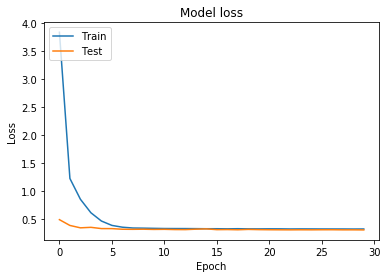

In [0]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer='adam')
history = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 6s 121us/step - loss: 4.0666 - val_loss: 0.7530
Epoch 2/30
51585/51585 [==============================] - 4s 76us/step - loss: 1.7433 - val_loss: 0.5799
Epoch 3/30
51585/51585 [==============================] - 4s 81us/step - loss: 1.5488 - val_loss: 0.4902
Epoch 4/30
51585/51585 [==============================] - 4s 78us/step - loss: 1.4173 - val_loss: 0.4531
Epoch 5/30
51585/51585 [==============================] - 4s 76us/step - loss: 1.3219 - val_loss: 0.4246
Epoch 6/30
51585/51585 [==============================] - 4s 77us/step - loss: 1.2772 - val_loss: 0.4058
Epoch 7/30
51585/51585 [==============================] - 4s 77us/step - loss: 1.2066 - val_loss: 0.3987
Epoch 8/30
51585/51585 [==============================] - 4s 82us/step - loss: 1.1531 - val_loss: 0.3845
Epoch 9/30
51585/51585 [==============================] - 4s 75us/step - loss: 1.1354 - val_loss: 0.3788
Epoch

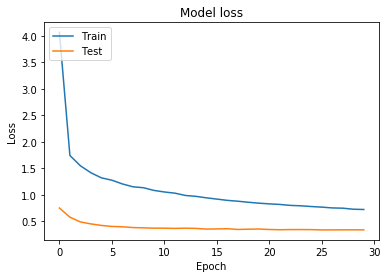

In [0]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer='adagrad')
history = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))

# Plot training & validation loss values
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 6s 121us/step - loss: 6.8290 - val_loss: 1.9899
Epoch 2/30
51585/51585 [==============================] - 4s 77us/step - loss: 2.4144 - val_loss: 0.9044
Epoch 3/30
51585/51585 [==============================] - 4s 75us/step - loss: 1.7282 - val_loss: 0.6377
Epoch 4/30
51585/51585 [==============================] - 4s 72us/step - loss: 1.4181 - val_loss: 0.5455
Epoch 5/30
51585/51585 [==============================] - 4s 80us/step - loss: 1.2259 - val_loss: 0.4913
Epoch 6/30
51585/51585 [==============================] - 4s 75us/step - loss: 1.0690 - val_loss: 0.4547
Epoch 7/30
51585/51585 [==============================] - 4s 78us/step - loss: 0.9826 - val_loss: 0.4350
Epoch 8/30
51585/51585 [==============================] - 4s 75us/step - loss: 0.9000 - val_loss: 0.4157
Epoch 9/30
51585/51585 [==============================] - 4s 74us/step - loss: 0.8320 - val_loss: 0.4052
Epoch

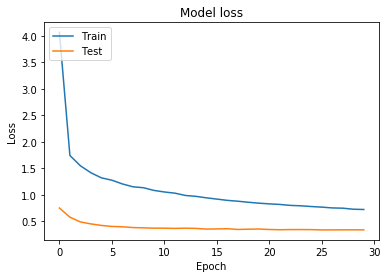

Train on 51585 samples, validate on 7296 samples
Epoch 1/30
51585/51585 [==============================] - 7s 131us/step - loss: 4.4817 - val_loss: 0.5090
Epoch 2/30
51585/51585 [==============================] - 5s 88us/step - loss: 1.3241 - val_loss: 0.4018
Epoch 3/30
51585/51585 [==============================] - 4s 80us/step - loss: 0.9019 - val_loss: 0.3575
Epoch 4/30
51585/51585 [==============================] - 4s 81us/step - loss: 0.6391 - val_loss: 0.3452
Epoch 5/30
51585/51585 [==============================] - 4s 81us/step - loss: 0.4735 - val_loss: 0.3394
Epoch 6/30
51585/51585 [==============================] - 4s 80us/step - loss: 0.3938 - val_loss: 0.3195
Epoch 7/30
51585/51585 [==============================] - 4s 83us/step - loss: 0.3566 - val_loss: 0.3211
Epoch 8/30
51585/51585 [==============================] - 4s 80us/step - loss: 0.3407 - val_loss: 0.3150
Epoch 9/30
51585/51585 [==============================] - 4s 83us/step - loss: 0.3318 - val_loss: 0.3080
Epoch

In [0]:
from time import time

# sgd
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer=SGD(lr=0.0002))
start = time()
history1 = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))
end = time()
time1 = end-start

# Plot training & validation loss values
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# adam
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer='adam')
start = time()
history2 = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))
end = time()
time2 = end-start

# adagrad
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer='adagrad')
start = time()
history3 = model.fit(X_tr, y_tr, epochs=30, validation_data=(X_val,y_val))
end = time()
time3 = end-start

120.10080885887146 129.00413489341736 124.19986081123352


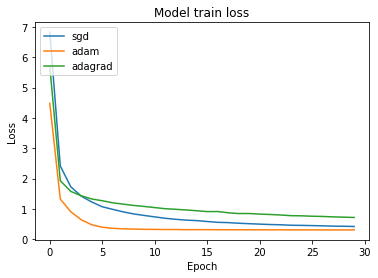

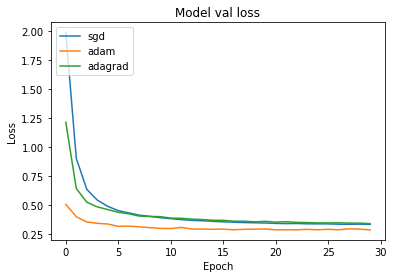

In [0]:
print(time1,time2,time3)

# Plot training & validation loss values
plt.plot(history1.history['loss'][:])
plt.plot(history2.history['loss'][:])
plt.plot(history3.history['loss'][:])
plt.title('Model train loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['sgd', 'adam','adagrad'], loc='upper left')
plt.show()

plt.plot(history1.history['val_loss'][:])
plt.plot(history2.history['val_loss'][:])
plt.plot(history3.history['val_loss'][:])
plt.title('Model val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['sgd', 'adam','adagrad'], loc='upper left')
plt.show()

### 1.m Testing 

Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error cuadrático medio de la predicción realizada sobre el _Test set_. Para puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? Si su curiosidad es suficiente, puede calcular el error real de su modelo transformando nuevamente el _target_ y su predicción a la escala original (utilizando su `scaler`) y tranformando a precio aplicando exponenciación (pues Y estaba espresado en escala logaritmica).

In [0]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activity_regularizer=l1(0.0001)))
model.compile(loss='mse',optimizer='adam')
history2 = model.fit(X_tr, y_tr, epochs=20, validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
score = model.evaluate(X_test,y_test)
print('Test score:', score)

Train on 51585 samples, validate on 7296 samples
Epoch 1/20
51585/51585 [==============================] - 7s 133us/step - loss: 3.2212 - val_loss: 0.5060
Epoch 2/20
51585/51585 [==============================] - 4s 81us/step - loss: 1.1676 - val_loss: 0.4202
Epoch 3/20
51585/51585 [==============================] - 4s 82us/step - loss: 0.8108 - val_loss: 0.3568
Epoch 4/20
51585/51585 [==============================] - 4s 82us/step - loss: 0.5915 - val_loss: 0.3367
Epoch 5/20
51585/51585 [==============================] - 4s 83us/step - loss: 0.4487 - val_loss: 0.3422
Epoch 6/20
51585/51585 [==============================] - 4s 80us/step - loss: 0.3815 - val_loss: 0.3198
Epoch 7/20
51585/51585 [==============================] - 4s 85us/step - loss: 0.3524 - val_loss: 0.3193
Epoch 8/20
51585/51585 [==============================] - 4s 82us/step - loss: 0.3415 - val_loss: 0.3166
Epoch 9/20
51585/51585 [==============================] - 4s 83us/step - loss: 0.3361 - val_loss: 0.3236
Epoch

In [0]:
y_pred = model.predict(X_test)
dif = np.exp(y_test) - np.exp(y_pred.reshape(y_pred.shape[0]))
neg = -1*dif[dif<0]
pos = dif[dif>=0]

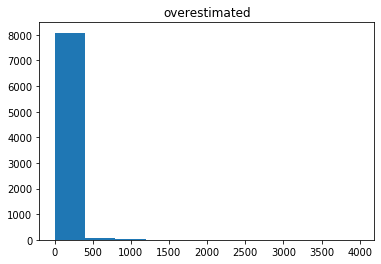

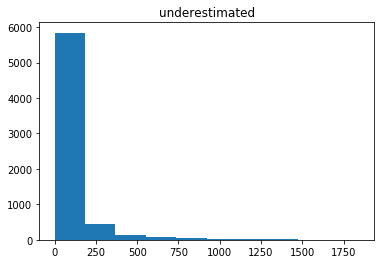

In [0]:
plt.hist(neg)
plt.title('overestimated')
plt.show()
plt.hist(pos)
plt.title('underestimated')
plt.show()

In [0]:
from scipy import stats

print(stats.describe(neg))
print(stats.describe(pos))

DescribeResult(nobs=8187, minmax=(0.0012664794922159217, 3989.140136718748), mean=55.685998632632085, variance=18293.46621379827, skewness=14.193879179630637, kurtosis=281.36504138194465)
DescribeResult(nobs=6625, minmax=(0.0017089843749715783, 1842.5155792236335), mean=95.02793085983566, variance=28050.528133012976, skewness=4.604233340211052, kurtosis=27.439877367656628)


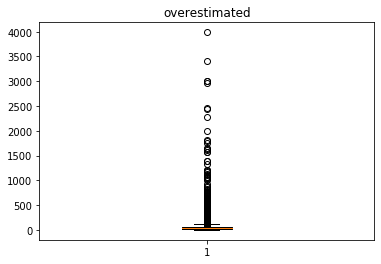

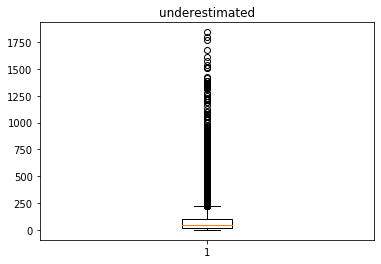

In [0]:
plt.boxplot(neg)
plt.title('overestimated')
plt.show()
plt.boxplot(pos)
plt.title('underestimated')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f2890088828>],
 'caps': [<matplotlib.lines.Line2D at 0x7f28900a20b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f28900a2a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f28900a2748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2890088978>,
  <matplotlib.lines.Line2D at 0x7f2890088d30>]}

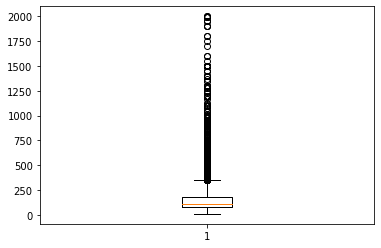

In [0]:
plt.boxplot(np.exp(y_test))

# 2 - Reconocimiento de Imagenes en CIFAR10

Una de las areas donde las redes neuronales han obtenido desempeños decisivamente superiores al resto de los métodos existentes en su momento es en el reconocimiento de imagenes. La capacidad de las redes convolucionaes de aprender y extraer patrones sobre patrones hasta obtener caracteristicas de alto nivel representativas de atributos buscados en las imaganes ha permitido en desempeños superiores a los obtenidos por otros métodos de aprendizaje automatico o inteligencia aritificial, e incluso en algunos casos a el desempeño humano. 

Una de las tareas usuales que se pueden resolver con redes neuronales convolucionales es la clasificación de imágenes. Uno de los _datasets_ más extendidos en la literatura para esta terea es el CIFAR10, el cual se compone de 50000 imagenes de entrenamiento de 10 clases distintas. El _dataset_ tiene un tamaño suficiente para lograr entrenar redes relativamente grandes y permite una buena introducción a este ampio campo, sobretodo por su facilidad de utilización y preprocesamiento prácticamente nulo. Durante esta pregunta utilizaremos este _dataset_ para explorar los conceptos básicos de redes convolucionales y algunas luces de problemas de clasificación. 

Note que el entrenamiento de redes convolucionales se beneficia particularmente del uso de unidades de procesamiento gráfico, por lo cual podría ser recomendable utilizarlas en caso de disponer, o considerar correr los codigos completos una vez verificado su funcionamiento en una sesión de Collab acelerada por GPU, entre otras opciones de GPU en la nube existentes. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


### 2.a Carga de datos y visualizaciones
Cargue los datos como muestra el código siguiente. Como pueden ver el dataset es tan utilizado que funciones para cargarlo vienen implementadas en keras. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (puede encontrar los nombres de las categorías en el siguiente link https://www.cs.toronto.edu/~kriz/cifar.html). ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

In [0]:
from keras.datasets import cifar10
(x_tr,y_tr),(x_val,y_val) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


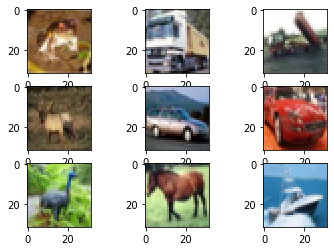

In [0]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_tr[i])
  
plt.show()

### 2.b Ligero preprocesamiento

Este _dataset_ viene tan bien preprocesado, con las clases balanceadas, el set de validación a parte y todas las imagenes de la misma dimensión que no será necesario gran preprocesamiento. Simplementen transformaremos la escala de las imagenes, de $[0,255]$ a $[-1,1]$. Para esto simplemente se puede realizar las operaciones aritmeticas que 
muestran en el código.

¿Perdemos información con este preprocesamiento? ¿Qué representa cada uno de los valores de la tupla `x_tr.shape`? 

¿Podemos considerar los valores de $y$ como valores numéricos o debemos transformarlos de alguna forma? 

Utilice la función `to_categorical` de keras para transformar $y$ a _encodding_ _one hot vector_. ¿Cómo se transformo el `.shape` de $y$?

In [0]:
x_tr = x_tr/127.5 - 1
x_val = x_val/127.5 - 1

print(x_tr.shape)
print(y_tr.shape)

y_tr = to_categorical(y_tr)
y_val = to_categorical(y_val)

print(y_tr.shape)

# . . . 

(50000, 32, 32, 3)
(50000, 1)
(50000, 10)


In [0]:
y_tr[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

Para obtener una mejor cualidad de los datos lo centramos en 0 y dejarmos entre los rangos -1,1. De tal manera de obtener ventajas en esta representación, al tener solo una representación de intensidad de 0 a 255, cambiar el rango no provocará una pérdida de información. 

X_tr.shape representa (cantidad_imagenes,x_pixel,y_pixel,R/G/B)

Los valores de y deben cambiarse, debido a que tener valores en orden creciente para identificar clases puede dar una mala interpretación, en el sentido que puede hacer entender que hay una relación diferente entre la clase 1-3 y 1-9, debido a la distancia numérica que tienen. Como no es el caso, se debe pasar a un vector de largo igual al número de clases, donde tenga un 1 a la clase correspondiente y un 0 en las que no corresponde. Con esto claramente se paso de un vector de Mx1 a Mx(número de clases).

### 2.c Primera red Convolucional

Entrenaremos una primera red convolucional sobre los datos, con la mayoría de los parámetros por defecto. Cree primero la red siguiendo la estructura $C\times P\times C\times P \times D$ donde $C$ representa una capa convolucional, $P$ una capa de _Max pooling_ y $D$ una capa densa. Note que antes de la capa densa debe agregar una capa _Flatten_ que transforma los filtros a vectores que luego pueden ser utilizados por la capa densa. 

Para los parámetros de las capas, fijaremos ambas capas convolucionales con 128 filtros de $3\times 3$ sin _stride_ y _padding 'same'_ (es decir agregaremos 0 a los bordes de la imagen de tal manera que se preserve la dimiensión de la imagen al atravesar la capa; y las capas de _pooling_ tendrán tamaño y _stride_ $2\times 2$, como muestra el código. Note que al igual que en la pregunta 1, el modelo en este caso es `Sequential`, pues los valores de una capa se pasan secuencialmente a la siguiente. 

Utilice el método `.summary` del modelo para ver la cantidad de parámetros y las dimensiones de los outputs de cada capa (note que como en la primera capa especificamos el `input_shape` podemos llamar el método antes de compilar el modelo o de pasarle datos. Justifique el número parámetros y el _Output Shape_ de cada capa en función de la estructura de la red y lo aprendido en clases. 

¿Por qué la capa de salida debe tener 10 neuronas? ¿Qué operación efectua la activación _SoftMax_? ¿Qué representaría en terminos del problema el vector de salida de la red?

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax')) # output

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

Al trabajar con 10 clases, la red necesita tener la opción de cualquiera de estas 10, para ello trabaja con la capa softmax que crea una distribución para las N clases y entregar una probabilidad de certeza para cada clase, al final cuando el modelo prediga eligirá la clase con mayor probabilidad y en caso de tener igualdad en alguna de ellas, eligirá cualquiera si no hay un criterio para dicernir.

### 2.d Primer entrenamiento

Compile la red definida en el item anterior. Para esta pregunta puede usar los optimizadores configurados por defecto, y debe usar como _loss_ _Categorical Crossentropy_. ¿Por qué preferimos medir _crossentropy_ y no por ejemplo _MSE_ en este problema? Mida igualmente el _accuracy_ como se muestra en el código. 

Entrene la red hasta observar convergencia (al rededor de 20 _epochs_ usualmente) recuperando su `history`. Grafique como varia el _accuracy_ en entrenamiento y validación a lo largo del aprendizaje. ¿Qué valor representa el _accuracy_? ¿Le parece buena medida de desempeño para este problema?

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 233us/step - loss: 1.2644 - acc: 0.5527 - val_loss: 1.0474 - val_acc: 0.6302
Epoch 2/20
50000/50000 [==============================] - 11s 225us/step - loss: 0.8825 - acc: 0.6953 - val_loss: 0.8768 - val_acc: 0.6934
Epoch 3/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.7098 - acc: 0.7551 - val_loss: 0.8208 - val_acc: 0.7162
Epoch 4/20
50000/50000 [==============================] - 11s 226us/step - loss: 0.5751 - acc: 0.8027 - val_loss: 0.7796 - val_acc: 0.7357
Epoch 5/20
50000/50000 [==============================] - 11s 226us/step - loss: 0.4558 - acc: 0.8464 - val_loss: 0.7909 - val_acc: 0.7378
Epoch 6/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.3550 - acc: 0.8840 - val_loss: 0.8186 - val_acc: 0.7370
Epoch 7/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.2754 - acc: 0.9119 - val_loss: 0.

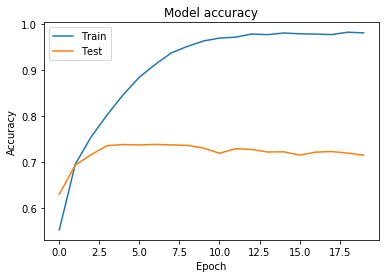

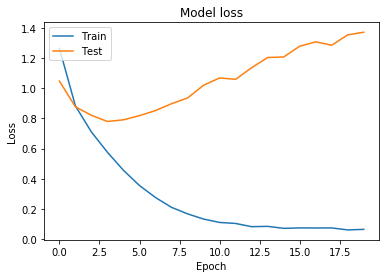

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_tr, y_tr, epochs=20, batch_size=32, verbose=1,validation_data=(x_val, y_val))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 2.e Bloque $C\times C\times P$

Una practica usual en redes convolucionales es apilar más de un filtro convolucional antes de aplicar _pooling_. La idea detras de esto es darle mas "espacio" a la red para aprender los patrones relevantes antes de realizar el subsampleo mediante el _pooling_. En el caso de este _dataset_ también nos permite agregar más capas convolucionales sin reducir tan fuertemente la dimensión de las imagenes filtradas. Incluso muchos investigadores optan por agregar más de una capa densa el final de la red, para dar aún más libertad al modelo, pues las restricciones impuestas sobre los parámetros por la estructura convolucional parecieran restringir lo suficiente al modelo y más libertad en las capas finales no pareciera implicar un _overfitting_ tan fuerte como sería por ejemplo en una red _Fully Connected_.

Cree y entrene una red, utilizando dos bloques de dos capas convolucionales y una de _maxpool_ y luego dos capas densas, es decir $C\times C\times P \times C\times C\times P\times D \times D$. Utilice $128$ filtros $3\times 3$ en las dos primeras convolucionales y $64$ filtros $3\times 3$ en las dos siguientes. Ambas capas de _maxpool_ utilice tamaño y _stride_ $2\times 2$. 

Comente como se compara el desempeño con las redes anteriores. Apoyese de gráficos y valores numéricos. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_tr.shape[1:]))
model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax')) # output

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)         

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_tr, y_tr, epochs=20, batch_size=32, verbose=1,validation_data=(x_val, y_val))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 34s 677us/step - loss: 2.1184 - acc: 0.2048 - val_loss: 2.0965 - val_acc: 0.2068
Epoch 2/20
50000/50000 [==============================] - 18s 358us/step - loss: 2.1785 - acc: 0.1665 - val_loss: 2.1884 - val_acc: 0.1617
Epoch 3/20
50000/50000 [==============================] - 18s 355us/step - loss: 2.2754 - acc: 0.1177 - val_loss: 2.3042 - val_acc: 0.0999
Epoch 4/20
50000/50000 [==============================] - 18s 358us/step - loss: 2.3071 - acc: 0.0982 - val_loss: 2.3063 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 18s 357us/step - loss: 2.3054 - acc: 0.1000 - val_loss: 2.3059 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 18s 358us/step - loss: 2.3045 - acc: 0.0969 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 7/20
5

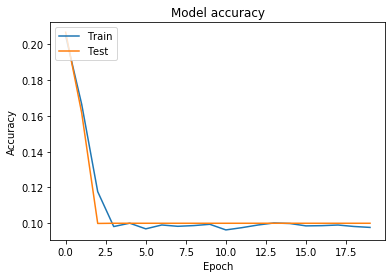

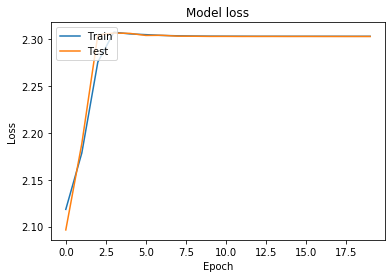

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 2.f Exploración de profundidad

Por comodidad preferiremos quedarnos con la estructura en bloques del item anterior. En esta pregunta deberan explorar que ocurre a medida uno cambia la profundidad de la red. Para esto, entrene redes con distinto numero de bloques. Debe a lo menos entrenar una red por cada numero de bloques entre 1 y 5 bloques (¿qué particularidad tiene la red con 5 bloques? ¿Puede entrenar una más profunda?). También si lo desea puede entrenar una red con "0" bloques, es decir una red densa como las de la pregunta 1. 

Comente sobre los casos extremos (0 bloques y 5 bloques), ya sea a partir de lo aprendido en clases o lo que observa al momento de entrenar las redes. ¿Le parece alguno de los dós sea buena aproximación para reconocimiento de imagenes? Para cada red recupere `history` y grafique el valor del mejor _accuracy_ en validación y el _accuracy_ sobre entrenamiento en el mismo _epoch_ en función de la profundidad de la red, similar al procedimiento realizado en 1.g.

Queda a su discreción los parámetros de cada capa convolucional, pueden utilizar el número de filtros que estimen convenientes, solo no utilicen _stride_, y en caso de utilizar alguna regla para el número de filtros, que tal regla sea la misma para todas las profundidades (pueden ver dos posibles ejemplos en el código propuesto abajo). Para las capas de _MaxPool_ utilicen las que aparecen en el código.

Para ahorrar tiempo, si observa que una red no converge, puede detener anticipadamente el entrenamiento. Para esto es recomendable usar el _Callback_ de keras `EarlyStopping` el cual deben agregar al momento de utilizar el método `.fit` (ejemplo similar en 1.e), sin embargo asegurese de ponerle _patience_ de a lo menos 3, pues como podrá observar algunas redes empeoran su desempeño en algunas _epochs_ para luego seguir mejorando. Puede elegir monitorear la métrica que estime conveniente para esta pregunta. 

In [0]:
from keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
acc_val = list()
acc_tr = list()


for block_num in range(6):

    # create model
    model = Sequential()

    for i in range(block_num):
        
        #model.add(Conv2D(128, (3,3),padding='same',activation='relu'))
        #model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
        #model.add(MaxPooling2D(pool_size=(2, 2)))

        # or for instance
        
        model.add(Conv2D(int(128/(i+2)), (3,3),padding='same',activation='relu'))
        model.add(Conv2D(int(128/(i+2)), (3,3), padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
    # flatten
    # dense's
    model.add(Flatten())
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(units=10, activation='softmax')) # output

    
    # compile
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(x_tr, y_tr, epochs=0)
    model.summary()
    
    # train and save results
    history = model.fit(x_tr, y_tr, epochs=20, batch_size=32, verbose=1,validation_data=(x_val, y_val),callbacks=[stop])

    val_acc = min(history.history['val_acc'])
    train_acc = history.history['acc'][np.argmin(history.history['val_acc'])]
    acc_val.append(val_acc)
    acc_tr.append(train_acc)
    

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 156us/step - loss: 1.8394 - acc: 0.3606 - val_loss: 1.7204 - val_acc: 0.3995
Epoch 2/20
50000/50000 [==============================] - 

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

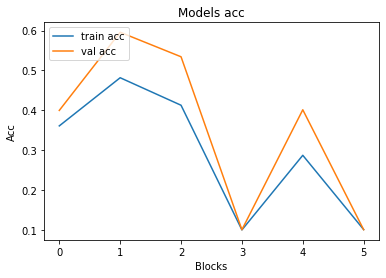

In [0]:
# Plot training & validation loss values
plt.plot(acc_tr)
plt.plot(acc_val)
plt.title('Models acc')
plt.ylabel('Acc')
plt.xlabel('Blocks')
plt.legend(['train acc', 'val acc'], loc='upper left')
plt.show()

### 2.g Exploración libre

Como probablemente ya habrán notado, la cantidad de hiperparámetros que se pueden fijar y explorar en una red convolucional es enorme. A parte de poder modificar la arquitectura de la red y su tamaño o profundidad, pueden en cada una de las capas modificar el número de filtros, el tamaño de los filtros; agregar _stride_, cambiar las activaciones, cambiar el _padding_, cambiar los tamaños de los _MaxPool_ o sus _strides_ o incluso modificar las capas densas al final de la red. 

Por motivos de tiempo y con la esperanza de que la tarea no sea más tediosa de lo necesario, en vez de pedir explorar cada uno de estos parámetros, se les propone elegir una exploración de la siguiente lista. Debe realizar la exploración exahustivamente, comentar sus resultados apoyandose de gráficos y su conocimiento teórico cuando sea apropiado. Independiente de la exploración elegida debe responder las preguntas finales. 

Para todas las exploraciones utilice como _template_ la mejor red entrenada hasta ahora y modifique el parámetro relevante. Si utiliza otra red, justifique brévemente su elección. 

**Exploraciones posibles (Elija 1)**
* Tamaño de los filtros: Manteniendo el filtro cuadrado, explore cambiar el tamaño de filtro de alguna(s) capas convolucionales. Debe explorar a lo menos valores de $1\times 1$ hasta $9\times 9$, por lo cual debe asegurarse realizar la exploración en una capa donde las dimensiones de los filtros de la capa anterior (o el Input de la capa) se lo permita. 
* Exploración del número de filtros: Explore variando el número de filtros de alguna(s) capas. Se recomienda explorar en potencias de 2, y debe explorar a lo menos 10 valores distintos.
* Neuronas capa Densa: realice una exploración del número de neuronas de alguna o ambas de las capas densas. Debe explorar a lo menos 10 combinaciones distintas. Puede dejar una de las dos capas fijas y variar la otra siguiendo potencias de 2 por ejemplo. Tenga cuidado con la explosión del número de parámetros. 
* Pooling: Pruebe cambiar el tamaño de los _MaxPool_ entre $2\times 2$ a $6\times 6$. Pruebe también cambiando todas las capas por `AveragePooling2D`, realizando la misma exploración que con _MaxPool_.
* Pooling "convolucional": Una aproximación posible para reemplazar las capas de _maxpool_ es utilizando capas convolucionales con kernel $2\times 2$ y _stride_ $2\times 2$. Pruebe reemplazando las capas _maxpool_ por este tipo de capas, luego pruebe una mezcla de ambas, luego pruebe simplemente eliminando las capas de _pooling_ y agregandole _stride_ a la segunda capa de cada bloque (con _kernel size_ $2\times 2$ y $3 \times 3$). Pruebe finalmente cambiando las funciones de activación de las capas donde se realiza la disminución de dimensión, probando a lo menos activación lineal, sigmoidea y tangente hiperbólica.

**Preguntas (respondalas todas)**:
* ¿A que equivaldría utilizar tamaño de kernel $1 \times 1$?
* ¿Por qué si cambiamos el número de filtros de una capa también modificamos el número de parámetros de la siguiente capa?
* ¿En su opinión, qué metodo resumen mejor la información de una capa, _maxpool_ o _averagepool_'
* ¿Que tipo de patrones esperaría usted que se extraigan mejor con un kernel no cuadrado (por ejemplo $3\times 2$)? Apoyese de un ejemplo pequeño o una explique el fenómeno llevandolo al "extremo" (e.g. $1\times 3$)

In [0]:
# do it yourself

### 2.h Dropout
Como vimos en la pregunta 1, _dropout_ es una técnica de regularización muy util para evitar overfitting. En el caso de convolucionales, aplicaremos _dropout_ en las capas densas al final. ¿Cree que es una buena idea aplicar _dropout_ en las capas convolucionales? ¿Por qué?

Entrene la mejor red que ha entrenado hasta ahora, agregando _dropout_ en a lo menos una de las capas densas. Donde aplique _dropout_ aumente el número de neuronas. Utilice parámetro 0.5. Reporte sus resultados apoyandose de gráficos. Recuerde que las redes con _dropout_ toman más tiempo en entrenar.

In [0]:
from keras.layers import Dropout

# create model
model = Sequential()

model.add(Conv2D(int(128/(i+2)), (3,3),padding='same',activation='relu'))
model.add(Conv2D(int(128/(i+2)), (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax')) # output


# compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_tr, y_tr, epochs=0)
model.summary()

# train and save results
history = model.fit(x_tr, y_tr, epochs=20, batch_size=32, verbose=1,validation_data=(x_val, y_val),callbacks=[stop])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 21)        588       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 21)        3990      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 21)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5376)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                344128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
___

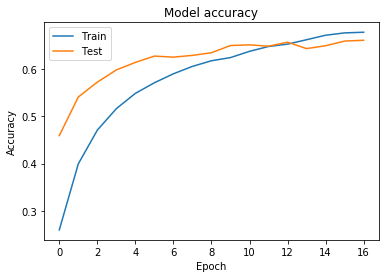

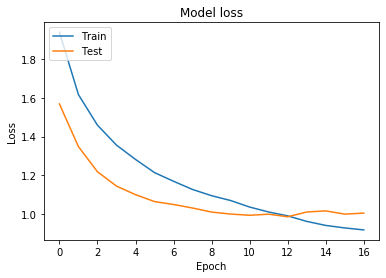

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 2.i Data Augmentation

Otra manera de evitar sobreajuste y mejorar los desempeños de una red convolucionar es usar aumentación de datos. La idea detras de este método es un hecho muy simple: si rotamos ligeramente una foto por ejemplo de un caballo, seguirá siendo de un caballo. Lo mismo si la movemos ligeramente hacia algun lado, hacia arriba, _etc_.

Keras trae implementado un generador de imagenes aumentadas, puede basarse en el código abajo para utilizarlo, aunque si lo desea o estima conveniente puede cambiar alguno de los parametros. Entrene a completitud la mejor red que obtuvo a lo largo de toda la tarea. ¿Qué tanto mejora el desempeño de la red utilizando aumentación de datos? 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

x_train = x_tr

datagen.fit(x_train)

# create model
model = Sequential()
model.add(Conv2D(int(128/(i+2)), (3,3),padding='same',activation='relu'))
model.add(Conv2D(int(128/(i+2)), (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax')) # output

# compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(datagen.flow(x_train, y_tr, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=callbacks,
                    validation_data=(x_val,y_val),
                    validation_freq=1,
                    shuffle=True)

RuntimeError: ignored

### 2.j Matriz de Confusión

Si bien el _accuracy_ nos ha acompañado toda la pregunta para evaluar el desempeño de nuestras redes de forma fácilmente interpretable, no considera por ejemplo si una gran parte de los errores provienen de una sola clase, o si alguna clase se logra clasificar perfectamente. Una manera de visualizar fácilmente esta métrica más granular, es utilizando la matriz de confusión. Investigue y explique brévemente en qué consiste una matriz de confusión (puede explicar el caso binario donde solo hay dos clases).

Luego, apoyándose en los códigos de abajo, visualizaremos la matriz de confusión del modelo que mejor se desempeñó a lo largo de toda la tarea. 

- ¿Algo le llama la atención? 
- ¿Qué clases se confunden más entre si?
- ¿Coincidió esto con sus predicciones al inicio de la tarea? 

Igual de la misma forma que en 2.a, visualice algunas imagenes mal clasificadas por su modelo. 
- ¿Le parece razonable que el modelo no las clasifique bien?

In [0]:
from sklearn.metrics import confusion_matrix
# Puede usar libreria seaborn para realizar facilmente heatmaps anotados: 
import seaborn as sns
# . . .
sns.heatmap( confusion_matrix(y_val # . . . ))

### 2.k Visualizaciones

Ahora, si bien vemos que nuestras redes se han comportado relativamente bien en esta tarea, no podríamos decir exactamente por qué. Una forma de acercarnos a entende aproximadamente que está haciendo la red es visualizando los pesos y viendo como se transforma una imagen a medida pasa por la red. 

Utilizando su red de mejor desempeño, represente gráficamente los pesos de las distintas capas, a lo menos de la primera y la última capa convolucional. Recuerde que puede obtener los pesos de una capa como se presenta en el item 1.k, teniendo atención que en este caso los pesos se presentarán como un array de los kernels.

Luego, de alguna clase elija unas imagenes al azar y grafíque los filtros que la red extrae a partir de la imagen a lo largo que esta pasa por las capas. Puede utilizar la función propuesta abajo para obtener el modelo truncado, luego con `.predict` obtendrá la imagen filtrada que busca. Nuevamente ponga énfasis en la primera y ultima capa. Elija otra clase y repita el proceso. Comente. 

In [0]:
def get_n_layers(max_layer, original_model):
    truncated_model = Sequential()
    for layer in range(max_layer):
        truncated_model.add(original_model.get_layer(index=lay))
    return truncated_model

# 3 - Reconocimiento de frutas y verduras

Si bien CIFAR10 es una buenisima herramienta para introducirse a las redes neuronales convolucionales, sin embargo varias características de CIFAR10 lo hacen estar un poco alejado de la realidad del reconocimiento de imagenes hoy en día. Por ejemplo, como pudieron notar en la pregunta anterior, la resolución de $32\times 32$ es a penas suficiente para reconocer el objeto. Además 10 clases es relativamente poco comparado con los modelos del estado del arte, que obtienen resultado decentes en problemas con miles de categorías. Otra cosa que podrían haber notado, es que las redes entrenadas no tenían mucho problema en diferenciar clases "más" distintas que otras (por ejemplo, que cree que hubiera pasado si hubieramos truncado el _dataset_ para solo contener la clase caballo y avión, ¿cree que los desempeños serían los mismos?), mientras que en categorías más "cercanas" (como perro, gato y caballo) los desempeños eran relativamente peores. Es por esto que muchos _datasets_ utilizados en el estado del arte incluyen no solo variedad entre sus categorías, si no tambien categorías similares, que podrían agruparse en categorías de mayor gerarquía incluso. 

En esta pregunta, intentaremos de realizar un analisis sobre un _dataset_ un poco más realista, donde encontrará algunos de los problemas asociados a trabajar con gran número de imagenes. Originalmente se consideró trabajar con uno de los _dataset_ usuales en el estado del arte, el Caltech256, sin embargo por motivos de tiempo se prefirió este _dataset_ donde las imagenes vienen todas en el mismo formato ($100\times 100$) y no tendrémos que realizar preprocesamiento más acabados como aquellos que necesitaríamos con Caltech. El _dataset_ en cuestión corresponde a un problema de reconocimiento de frutas y verduras, disponible en el siguiente link de _kaggle_ https://www.kaggle.com/moltean/fruits o en el siguiente repositorio https://github.com/Horea94/Fruit-Images-Dataset. Este _dataset_ contiene miles de imagenes de 120 frutas y verduras diferentes clasificadas por variedades. Intentaremos resolver este problema utilizando las 120 clases, notando que si bien el hecho de acortarse a un campo semantico en particular (i.e. frutas y verduras) permitirá que nuestro algoritmo se especialice más en la detección de las diferencias entre sus categorías, también implica que las diferencias seran más pequeñas que lo que serían en un _dataset_ más variado. Luego intentaremos resolver el problema utilizando categorías más amplias, donde no se distinga entre variedades de la misma fruta, y veremos en qué tarea tenemos mejor desempeño. 

### 3.a Carga y preprocesamiento de Imagenes

Lea la descripción del dataset para familiarizarse con la estructura donde se guardan las imagenes y como deberemos cargarlas recordando la categoría de cada una. 

Cargue todas las imagenes junto con sus categorías a un _DataFrame_. Note que esto puede tomar bastante tiempo por la cantidad de imagenes. El código propuesto utiliza la librería Pillow, sin embargo pueden usar el método que prefieran, incluso pueden no basarse para nada en el código propuesto. Aprovecharemos la separación de _Training_ y _Test_ de _dataset_, y utilizaremos el primero para entrenamiento y el segundo para validación. 

Esta vez optaremos por dejar los valores entre $[-127, 128]$ para poder utilizar un encoding `uint8` en `numpy` lo cual reducirá drásticamente el uso de memoria al momento de cargar los datos. Separe luego los arrays de inputs y outputs de nuestro modelo, sin olvidar transformar las categorías del _target_ a _one hot vector_ como aprendió en el resto de la tarea. 

Si lo desea, podría ser recomendable guardar los datos preprocesados utiizando la función `np.save` para ahorrarse el tiempo de computo que requiere esta operación en caso de que tuviera que correr varias veces esta pregunta. 

Visualice alguna de las imagenes en `image_list`. Verifique que los datos se hayan cargado bien viendo los `shape` de los arrays o con algun otro indicador que le dé algo de confianza. Utilice `matplotlib.pyplot.imshow` con algunos ejemplos de los _arrays_ para verificar que no se haya perdido información y que la carga de datos se realizó correctamente. 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import PIL.Image  
from tempfile import TemporaryFile
import os
import pandas as pd
import numpy as np

#-----------------------------------------------------------------------
#--------------------------------Training set---------------------------
#-----------------------------------------------------------------------

# Base path same for training set and test set

os.chdir("/content/drive/My Drive/IRNA/fruits-360_dataset")
base_path = os.getcwd()

# Path for training set
data_path = os.path.join(base_path, "fruits-360", "Training") 
categories = os.listdir(data_path)

# Image list for training set
image_list_tr = []

# Training images
x_tr = []

# Training labels
y_tr = []

df = pd.DataFrame(columns=['x','y'])
for cat in categories:
    image_files = os.listdir(os.path.join(data_path, cat))
    for image_path in image_files:
        if '.jpg' in image_path: # to avoid unpleseant surprises
            full_path = os.path.join(data_path, cat, image_path)
            im = PIL.Image.open(full_path)
            arr = np.asarray(np.asarray(im).astype('uint8') - 128).astype('int8')                      
            x_tr.append(arr)
            y_tr.append(cat)
            df = df.append({'x':arr, 'y':cat}, ignore_index=True)
    image_list_tr.append(im)
    
x_tr = np.array(x_tr)    
y_tr = np.array(y_tr)



#-----------------------------------------------------------------------
#--------------------------------Validation set-------------------------
#-----------------------------------------------------------------------

# Path for test set
data_path = os.path.join(base_path, "fruits-360", "Test")
categories = os.listdir(data_path)

# Image list for validation set
image_list_val = []

# Validation images
x_val = []

# Validation labels
y_val = []


df_val = pd.DataFrame(columns=['x','y'])
for cat in categories:
    image_files = os.listdir(os.path.join(data_path, cat))
    for image_path in image_files:
        if '.jpg' in image_path: # to avoid unpleseant surprises
            full_path = os.path.join(data_path, cat, image_path)
            im = PIL.Image.open(full_path)
            arr = np.asarray(np.asarray(im).astype('uint8') - 128).astype('int8')            
            x_val.append(arr)
            y_val.append(cat)
            df_val = df_val.append({'x':arr, 'y':cat}, ignore_index=True)        
    image_list_val.append(im)
    
x_val = np.array(x_val)
y_val = np.array(y_val)
y_tr = y_tr.reshape(y_tr.shape[0],1)
y_val = y_val.reshape(y_val.shape[0],1)

print(x_tr.shape)
print(x_val.shape)
print(y_tr.shape)
print(y_val.shape)

#-----------------------------------------------------------------------
#--------------------------------One Hot Vector-------------------------
#-----------------------------------------------------------------------

from sklearn import preprocessing
from keras.utils.np_utils import to_categorical

# Convert labels from text to numerical index

# OHV Training set
le = preprocessing.LabelEncoder()
le.fit(y_tr)
labels_tr = le.transform(y_tr)

# OHV Validation set
le = preprocessing.LabelEncoder()
le.fit(y_val)
labels_val = le.transform(y_val)


# Convert to nomerical index to binary matrix
y_tr = to_categorical(labels_tr)
y_val = to_categorical(labels_val)


#print(x_tr.shape)
#print(x_val.shape)
print("OHV y_tr", y_tr.shape)
print("OHV y_val", y_val.shape)






x_tr_file = TemporaryFile()
np.save(x_tr_file, x_tr)

y_tr_file = TemporaryFile()
np.save(y_tr_file, y_tr)

x_val_file = TemporaryFile()
np.save(x_val_file, x_val)

y_val_file = TemporaryFile()
np.save(y_val_file, y_val)

FileNotFoundError: ignored

### 3.b Primera red
Entrene una primera red que alcance un _accuracy_ sobre validación de a lo menos un $80\%$

Puede utilizar todos los conceptos aprendidos en la tarea anterior, aunque la recomendación es dejar _Data Augmentation_ para una última iteración, una vez ya hayamos encontrado una estructura que se comporte relativamente bien. Una arquitectura relativamente buena podria ser una basada en los bloques definidos en el item 2.e, con al rededor de 5 bloques. Si desea aumentar la profundidad de su red sientase libre utilizar otras estructuras con menos _MaxPool_. Note que la nueva base de datos permite crear redes más profundas de todas  formas, pues no se alcanza el limite impuesto por la dimensión de las imagenes tan pronto. 

Reporte el resultado de un par de redes, comentando por qué realizo ajustes a ellas. Note que estos entrenamiento implican calculos con grandes cantidades de datos y probablemente sea recomendarlo correrlos en _hardware_ acelerado por GPU. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# C x C x P
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', input_shape=np.asarray(x_tr).shape[1:]))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# C x C x P
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# C x C x P
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten & Dense
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=120, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()

history = model.fit(x_tr, y_tr, epochs=30, validation_data=(x_val, y_val), callbacks=[EarlyStopping(patience=6)])

plt.plot(history.history['acc'], label="Training accuracy")
plt.plot(history.history['val_acc'], label="Validation accuracy")
plt.title("Accuracy vs epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 100, 100, 128)     3584      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 100, 100, 128)     147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 50, 50, 64)        73792     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 25, 25, 32)      

NameError: ignored

### 3.c Batch Normalization
Una manera propuesta de mejorar los desempeños de las redes en general, que funciona bastante bien en tareas de reconocimiento de imagenes es _Batch Normalization_. Segun su conocimiento teórico y investigación, ¿Qué realiza _Batch Normalization_ en términos matemáticos? En terminos de aprendizaje, ¿qué evita la utilización de _Batch Normalization_?

Entren nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ luego de cada capa de _MaxPool_. Comente sus resultados. 

¿Mejoran los desempeños de la red agregando _Batch Normalization_? ¿Existe diferencias entre una capa de _batch normalization_ justo antes o justo despues de una capa de _MaxPool_ en términos numéricos? ¿Opina lo mismo en términos de aprendizaje? Discuta. 

### 3.d Skip Connections
Otra manera de mejorar los resultados de las redes, sobretodo de las redes profundas donde se observa el problema de _vanishing gradient_ son las relativamente nuevas _skip connections_ o redes residuales. En vez de preocuparse de como manejar los pesos de la red para permitir que el gradiente no explote o no desaparezca, se permite al gradiente "pasar" sin ser modificado, agregando conecciones con pesos fijos entre capas de distintas profundidades, en la practica permitiendo a la señar "saltarse" las capas intermedias. Esta idea ha permitido desarrollos como los de ResNet, llegando a profundidades de cientos de capas y aún logrando aprendizaje. 

Para implementar estas ideas debemos utilizar la API funcional de Keras al momento de construir los modelos. Algo que debemos notar es que la mayoría de los objetos de keras pueden ser llamados como funciones, y al momento de hacerlo con objetos `layers` es equivalente a conectarlos, por lo cual si hacemos `x(y)` retornamos un objeto con la capa `y` conectada a la capa `x`. 

Basandose en el código mostrado abajo, implemente una ResNet de su gusto, puede agregar _Skip conections_ a una red utilizada anteriormente o crear una nueva. Con estas redes debería lograr facilmente un _accuracy_ de al menos $90\%$

Comente sus resultados. 

In [0]:
x = Input(x_tr.shape[1:])

y = Conv2D(64, (3,3),padding='same',activation='relu')(x)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)

z = concatenate([x, y])

z = MaxPooling2D(pool_size=(2, 2))(z)

y = Conv2D(64, (3,3),padding='same',activation='relu')(z)
y = Conv2D(64, (3,3),padding='same',activation='relu')(y)

z = concatenate([z, y])

# . . .


# . . . 


out = Dense(120, activation='softmax')(z)

res_mod = Model(inputs=x, output=out)

### 3.e Red Final 

De todas las redes entrenadas anteriormente, elija la con mejor desempeño y entrenela utizando aumentación de datos como aprendió en las preguntas anteriores. ¿Mejora el desempeño de la red? 

### 3.f Modelo para frutas
Repita la el item anterior, pero esta vez sobre el problema de clasificación de las frutas y verduras independiente de sus variedades. Para esto deberá cargar nuevamente los datos, esta vez transformando las categorías que originalmente eran un `string` a la primera palabra del string. Así al momento de hacer el paso a categorías y _one hot vector_, todas las imagenes con la misma fruta o verdura quedarán en la misma categoría. 

- ¿Cómo se desempeña el modelo esta vez? 
- ¿_A priori_ cuál habría considerado el problema más dificil para un modelo de aprendizaje de máquinas? Discuta. 